In [2]:
import sys
import os
#sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__)))) # for scripts
project_root = '/Users/emilykruger/Documents/GitHub/CSH-Internship'
functions_dir = os.path.join(project_root, 'src/functions')
sys.path.append(project_root) #for local notebook
sys.path.append(functions_dir) #for local notebook


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.functions.linguistic_features import remove_tags
import regex as re
from textstat import flesch_reading_ease

# Dataset Exploration

In [2]:
sample_df = pd.read_csv('../data/selected_groups_with_transcriptions.csv.gzip', compression='gzip')
pd.set_option('display.max_columns', None)
sample_df.head()

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/1608947271.py:1: DtypeWarning: Columns (12,13,26,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv('../data/selected_groups_with_transcriptions.csv.gzip', compression='gzip')


,Unnamed: 0,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,posting_date_file,link_url,media_file,media_file_type,fwd_posting_date_file,fwd_link_url,fwd_media_file,fwd_media_file_type,author,fwd_author,day,week,weekday,message_hash,fwd_message_hash,website,replied_to,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score
0,0,209982-6408240263544091615,0,209982.0,209982.0,Helfende Q Hände 👐👏,2021-11-09 22:50:15+00:00,Oki 😃,NaN,NaN,2021-11-09 22:50:15+00:00,messages199.html#go_to_message209980,NaN,NaN,NaN,NaN,NaN,NaN,9.267455e+17,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,-3.596942e+18,NaN,NaN,209980-6408240263544091615,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,209983-6408240263544091615,1,209983.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:18+00:00,Von weiblich bis männlich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,-7.438051e+18,NaN,NaN,NaN,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,209984-6408240263544091615,2,209984.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:23+00:00,Von direkt zu zurückhaltend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,-5.141813e+18,NaN,NaN,NaN,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,209985-6408240263544091615,3,209985.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:28+00:00,Wie bei WOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,4.179569e+18,NaN,NaN,NaN,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,209986-6408240263544091615,4,209986.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:47+00:00,Neuer Charakter und XP sammeln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-09 12:00:00+00:00,45.0,2.0,3.772441e+18,NaN,NaN,NaN,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sample_df = sample_df.drop('Unnamed: 0', axis=1)

In [4]:
sample_df.dtypes

UID_key                      object
initial_ID                    int64
mid_message                 float64
mid_file                    float64
group_name                   object
posting_date                 object
message                      object
fwd_message                 float64
fwd_posting_date_message    float64
posting_date_file            object
link_url                     object
media_file                   object
media_file_type              object
fwd_posting_date_file        object
fwd_link_url                 object
fwd_media_file               object
fwd_media_file_type          object
author                      float64
fwd_author                  float64
day                          object
week                        float64
weekday                     float64
message_hash                float64
fwd_message_hash            float64
website                      object
replied_to                   object
year                        float64
month                       

In [5]:
#checking content of some columns
sample_df[sample_df['transcribed_message'].notnull()].head(10)

,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,posting_date_file,link_url,media_file,media_file_type,fwd_posting_date_file,fwd_link_url,fwd_media_file,fwd_media_file_type,author,fwd_author,day,week,weekday,message_hash,fwd_message_hash,website,replied_to,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score
272,210200-6408240263544091615,272,NaN,210200.0,Helfende Q Hände 👐👏,2021-11-10 00:41:43+00:00,NaN,NaN,NaN,2021-11-10 00:41:43+00:00,NaN,voice_messages/audio_11825@10-11-2021_00-41-43...,voice message,NaN,NaN,NaN,NaN,-9.029508e+18,NaN,2021-11-10 12:00:00+00:00,45.0,3.0,NaN,NaN,NaN,NaN,2021.0,11.0,314.0,120.6265,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11825@10-11-2021_00-41-43...,voice_messages/audio_11825@10-11-2021_00-41-43...,"Weißt du, das war wieder so ein klassischer F...",NaN,NaN
684,201493-6408240263544091615,684,201493.0,201493.0,Helfende Q Hände 👐👏,2021-11-03 22:15:33+00:00,Ich war sehr selten in meinem Leben so Ruhig. ...,NaN,NaN,2021-11-03 22:15:33+00:00,NaN,voice_messages/audio_11614@03-11-2021_22-15-33...,voice message,NaN,NaN,NaN,NaN,1.283475e+18,NaN,2021-11-03 12:00:00+00:00,44.0,3.0,5.042036e+18,NaN,t.me,NaN,2021.0,11.0,307.0,148.4665,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11614@03-11-2021_22-15-33...,voice_messages/audio_11614@03-11-2021_22-15-33...,Guten Abend. Ich habe soeben die Voice von Ge...,NaN,NaN
890,200826-6408240263544091615,890,NaN,200826.0,Helfende Q Hände 👐👏,2021-11-03 13:07:08+00:00,NaN,NaN,NaN,2021-11-03 13:07:08+00:00,NaN,voice_messages/audio_11557@03-11-2021_13-07-08...,voice message,NaN,NaN,NaN,NaN,-1.718680e+18,NaN,2021-11-03 12:00:00+00:00,44.0,3.0,NaN,NaN,NaN,NaN,2021.0,11.0,307.0,164.4265,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11557@03-11-2021_13-07-08...,voice_messages/audio_11557@03-11-2021_13-07-08...,"Ja, ich sehe das auch so. Nur was mir komisch...",NaN,NaN
891,200828-6408240263544091615,891,NaN,200828.0,Helfende Q Hände 👐👏,2021-11-03 13:10:27+00:00,NaN,NaN,NaN,2021-11-03 13:10:27+00:00,NaN,voice_messages/audio_11557@03-11-2021_13-07-08...,voice message,NaN,NaN,NaN,NaN,-1.718680e+18,NaN,2021-11-03 12:00:00+00:00,44.0,3.0,NaN,NaN,NaN,NaN,2021.0,11.0,307.0,164.4265,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11557@03-11-2021_13-07-08...,voice_messages/audio_11557@03-11-2021_13-07-08...,"Ja, ich sehe das auch so. Nur was mir komisch...",NaN,NaN
911,200975-6408240263544091615,911,NaN,200975.0,Helfende Q Hände 👐👏,2021-11-03 15:51:10+00:00,NaN,NaN,NaN,2021-11-03 15:51:10+00:00,NaN,voice_messages/audio_11567@03-11-2021_15-51-10...,voice message,NaN,NaN,NaN,NaN,4.853842e+18,NaN,2021-11-03 12:00:00+00:00,44.0,3.0,NaN,NaN,NaN,NaN,2021.0,11.0,307.0,93.1465,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_11567@03-11-2021_15-51-10...,NaN,"Man muss versuchen sich da rauszuziehen, auch...",NaN,NaN
1980,106881-6408240263544091615,1980,NaN,106881.0,Helfende Q Hände 👐👏,2021-07-10 12:36:14+00:00,NaN,NaN,NaN,2021-07-10 12:36:14+00:00,NaN,voice_messages/audio_5321@10-07-2021_12-36-14.ogg,voice message,NaN,NaN,NaN,NaN,1.915898e+18,NaN,2021-07-10 12:00:00+00:00,27.0,6.0,NaN,NaN,NaN,NaN,2021.0,7.0,191.0,104.3065,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_5321@10-07-2021_12-36-14.ogg,NaN,Also erstmal nervste mich überhaupt nicht. Ic...,NaN,NaN
1989,106916-6408240263544091615,1989,NaN,106916.0,Helfende Q Hände 👐👏,2021-07-10 12:48:47+00:00,NaN,NaN,NaN,2021-07-10 12:48:47+00:00,NaN,voice_messages/audio_5327@10-07-2021_12-48-47.ogg,voice message,NaN,NaN,NaN,NaN,-7.575311e+18,NaN,2021-07-10 12:00:00+00:00,27.0,6.0,NaN,NaN,NaN,NaN,2021.0,7.0,191.0,78.7465,/nas-slot4/schwurbel2/schwurbelarchiv-NPFJtWIX...,voice_messages/audio_5327@10-07-2021_12-48-47.ogg,voice_messages/audio_5327@10-07-2021_12-48-47.ogg,"Guck mal,

In [6]:
#look at transcribed messages
def insert_line_breaks(text, n=100):
    """Inserts a line break every n characters in the text."""
    return '\n'.join(text[i:i+n] for i in range(0, len(text), n))

transcriptions = sample_df[sample_df['transcribed_message'].notnull()].head(10)

for index, row in transcriptions.iterrows():
    adjusted_text = insert_line_breaks(row['transcribed_message'], 100)
    print(f"Entry {index+1}:")
    print(adjusted_text)
    print("\n" + "-"*50 + "\n")

Entry 273:
 Weißt du, das war wieder so ein klassischer Fall von, sie hat einfach keine Ahnung, was sie da gesa
gt hat. Sie hat damit, indem sie mir Unsicherheiten projiziert, da hat sie im Prinzip ganz offen mei
ner freundens Gesicht gespuckt. Weil, für Unsicherheiten ist sie da. Sie ist dafür da, mir zu sagen,
 wenn ich Dinge falsch mache. Und nicht irgendeine Bianca, die in meiner Gruppe ist und gegensätzlic
h für mich spricht. Also, eine Frechheit einfach. Die Leute sind sich gar nicht bewusst, was sie da 
sagen und wundern sich, wenn man dann angepisst ist. Weil sie einfach nur irgendwas blubbern. Und da
s ist bei Frauen nämlich das Problem, wenn sie, denn sie war halt auch, ist halt auch nicht offen, a
ber sie hat auch in diesem, dieses New Age-Dick, dieses Rumtransit, die in diesem Bullshit, hat sie 
auch noch mit drin. Und du siehst, ach man, ich hab's schon mal vergessen, was ich sagen wollte. Da 
finden wir einfach die Worte. Ach genau, ja genau, ja genau. Und die sind dann s

In [7]:
messages = sample_df[sample_df['message'].notnull()].head(50)

for index, row in messages.iterrows():
    adjusted_text = insert_line_breaks(row['message'], 100)
    print(f"Entry {index+1}:")
    print(adjusted_text)
    print("\n" + "-"*50 + "\n")

Entry 1:
Oki 😃       

--------------------------------------------------

Entry 2:
Von weiblich bis männlich       

--------------------------------------------------

Entry 3:
Von direkt zu zurückhaltend       

--------------------------------------------------

Entry 4:
Wie bei WOW       

--------------------------------------------------

Entry 5:
Neuer Charakter und XP sammeln       

--------------------------------------------------

Entry 6:
"Der kleine Nerd" oder "mr scheisse einfach" Ist mein Hauptcharakter. Quasi ich selbst. Ein Spielkin
d. Kleiner Bro für jeden.       

--------------------------------------------------

Entry 7:
In diesem Sinne....🤗 haltet die Ohren steif, Augen zu und durch!🙈😅❤  <a href="t.me/LichtseelenKanal"
>t.me/LichtseelenKanal</a>

--------------------------------------------------

Entry 8:
Quasi wie Mr Jackel und Doktor Hide 🤔🤔🤔😂😂😂😂😂😂       

--------------------------------------------------

Entry 9:
Jetzt der Böse part 😂😂😂       

----------

# Model Exploration

In [8]:
#get sample of sample_df
filtered_df = sample_df[sample_df['message'].notna()]
sampled_df = filtered_df.sample(n=150, replace=True if len(filtered_df) < 150 else False)

sample = sampled_df[['message']]
sample.head()


#set options to display all rows of df
pd.set_option('display.max_rows', None)

## Complexity/ Readability

### TextStat for Flesch Readability

In [9]:
import textstat

textstat.set_lang('de')
flesch_scores = []

for message in sample['message']:
    score = textstat.flesch_reading_ease(message)
    flesch_scores.append(score)
sample['flesch_reading_ease'] = flesch_scores

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/1452775700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['flesch_reading_ease'] = flesch_scores


In [10]:
sample

,message,flesch_reading_ease
2563896,Einen Strafantrag in der jüdischen FiIrma BRD ...,45.85
2194250,"An uns soll es nicht liegen ... <a href=""https...",-56.16
3183702,Das ist aber früh....also für Ferienzeiten,60.00
3084566,👍👍👍,180.00
2213240,Weiter links,90.25
2110224,Allerdings...,3.50
3152003,Es darf nicht nur in Berlin krachen. Sie sollt...,90.60
3896307,Anguis fragilis vielleicht?,42.45
1608914,wichtig gesunde ernährung aber eines kann ich ...,54.70
2626541,"Kontodaten wüsste ich nicht, via Paypal ist es...",79.25


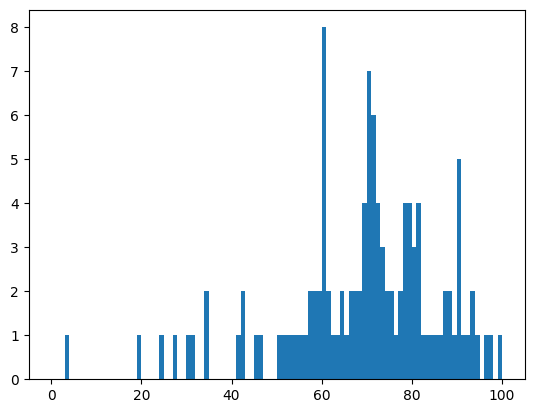

In [11]:
# plot histogram of scores between 0 and 100
plt.hist(sample['flesch_reading_ease'], bins=100, range=(0, 100));

In [12]:
sample[sample['flesch_reading_ease'] >100]

,message,flesch_reading_ease
3084566,👍👍👍,180.00
2267541,Was zum ....,119.50
2163741,oder einen Kaffee to go (bzw. to storm) und da...,109.15
3271840,und mit dem Fernglas auch noch nicht 😉,108.65
1316547,👍🏻🇺🇸🇺🇸🇺🇸 🇷🇺🇷🇺🇷🇺,180.00
3180899,Da tun mir die Tiere leid,103.80
662761,👍,180.00
348671,Gern,120.50
3936228,Nein eher nicht,118.50
1319220,🤣🤣🤣,180.00


### Hugging Face: krupper/text-complexity-classification

In [13]:
from transformers import pipeline
classifier = pipeline(model="krupper/text-complexity-classification")

/Users/emilykruger/Documents/GitHub/CSH-Internship/csh_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
complex_label = []

for message in sample['message']:
    try:
        result = classifier(message)
        complex_label.append(result[0]['label'])
    except:
        complex_label.append('error')
sample['complexity_krupper'] = complex_label

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/1101831005.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['complexity_krupper'] = complex_label


In [15]:
classifier("Das ist ein einfacher Satz.")
#extract label from output
result = classifier("Das ist ein einfacher Satz.")
result[0]['label']

'everyday_language'

In [16]:
for message in sample[sample['complexity_krupper'] != 'everyday_language']['message']:
    print(message + "\n")

wichtig gesunde ernährung aber eines kann ich sehr empfehlen uns das ist frisches sauerkraut (also nicht pasteurisiert) Die Milchsäurebakterien bilden mit dem Tumor ein Racemat dass als Energie der Leber zugeführt wird. Damit wird der Tumor mit der Zeit kleiner       

Meine Pflege Schwester       

Es ist aber ein modifizierter Adenovirus das Gen basiert ist, hat mit dem Orginalen nichts so wirklich zu tun 😉. Aber trotzdem ist es kein klassischer Vektortotenimpfstoff, sonder eher eine Gen-Therapie       

Wer weiß, vielleicht werden wir bereits von Quanten Ki s manipuliert und gesteuert🤔       

🙏🙏🙏🙏Die Zeit ist gekommen, wo all der Schmerz vorbei ist. 🙏🙏🙏🙏🥰🥰🥰🥰       

Raaatet mal wer diese Song sehr gerne mag.🥳🥳🥳❤️       

Und der Rest ist außer sich, weil sie es nicht glauben können, dass andere es geglaubt haben       

INNER EARTH != HOLLOW EARTH  INNERE ERDE! = HOHLE ERDE       

Ja so konnte ich das auch immer lesen. Ohne Namen etc. Ok. Hätte ja sein können das Du schon mehr wei

### Hugging Face: MiriUll/distilbert-german-text-complexity

## Sentiment

### HuggingFace: aari1995/German_Sentiment

In [17]:
sentiment_model = pipeline(model="aari1995/German_Sentiment")

In [18]:
sentiment_label = []
for message in sample['message']:
    try:
        result = sentiment_model(message)
        sentiment_label.append(result[0]['label'])
    except:
        sentiment_label.append('error')

sample['sentiment_aari'] = sentiment_label

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/3735395712.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['sentiment_aari'] = sentiment_label


In [19]:
sample

,message,flesch_reading_ease,complexity_krupper,sentiment_aari
2563896,Einen Strafantrag in der jüdischen FiIrma BRD ...,45.85,everyday_language,neutral
2194250,"An uns soll es nicht liegen ... <a href=""https...",-56.16,everyday_language,neutral
3183702,Das ist aber früh....also für Ferienzeiten,60.00,everyday_language,positive
3084566,👍👍👍,180.00,everyday_language,negative
2213240,Weiter links,90.25,everyday_language,neutral
2110224,Allerdings...,3.50,everyday_language,negative
3152003,Es darf nicht nur in Berlin krachen. Sie sollt...,90.60,everyday_language,negative
3896307,Anguis fragilis vielleicht?,42.45,everyday_language,positive
1608914,wichtig gesunde ernährung aber eines kann ich ...,54.70,plain_language,neutral
2626541,"Kontodaten wüsste ich nicht, via Paypal ist es...",79.25,everyday_language,positive


In [20]:
#for the first 10 rows, print message and sentiment
for index, row in sample.head(10).iterrows():
    print(f"Message: {row['message']}")
    print(f"Sentiment: {row['sentiment_aari']}")
    print("\n" + "-"*50 + "\n")

Message: Einen Strafantrag in der jüdischen FiIrma BRD und damit an einen jüdischen Firmengerichte zu stellen - was soll dabei raus kommen in der Firmendiktatur !?       
Sentiment: neutral

--------------------------------------------------

Message: An uns soll es nicht liegen ... <a href="https://www.bundesstaat-deutschland.de/tdr.html">https://www.bundesstaat-deutschland.de/tdr.html</a> ...       
Sentiment: neutral

--------------------------------------------------

Message: Das ist aber früh....also für Ferienzeiten       
Sentiment: positive

--------------------------------------------------

Message: 👍👍👍       
Sentiment: negative

--------------------------------------------------

Message: Weiter links       
Sentiment: neutral

--------------------------------------------------

Message: Allerdings...       
Sentiment: negative

--------------------------------------------------

Message: Es darf nicht nur in Berlin krachen. Sie sollten nicht mehr wissen wohin sie müssen  

### Hugging Face: oliverguhr/german-sentiment-bert

In [21]:
from germansentiment import SentimentModel

model = SentimentModel()

In [22]:
sentiment_label_bert = []

for message in sample['message']:
    try:
        result = model.predict_sentiment(message)
        sentiment_label_bert.append(result)
    except:
        sentiment_label_bert.append('error')

sample['sentiment_bert'] = sentiment_label_bert

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/3612617335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['sentiment_bert'] = sentiment_label_bert


In [23]:
sample

,message,flesch_reading_ease,complexity_krupper,sentiment_aari,sentiment_bert
2563896,Einen Strafantrag in der jüdischen FiIrma BRD ...,45.85,everyday_language,neutral,"[negative, positive, positive, negative, posit..."
2194250,"An uns soll es nicht liegen ... <a href=""https...",-56.16,everyday_language,neutral,"[positive, positive, negative, positive, posit..."
3183702,Das ist aber früh....also für Ferienzeiten,60.00,everyday_language,positive,"[negative, positive, negative, negative, posit..."
3084566,👍👍👍,180.00,everyday_language,negative,"[negative, negative, negative, negative, negat..."
2213240,Weiter links,90.25,everyday_language,neutral,"[positive, negative, positive, positive, negat..."
2110224,Allerdings...,3.50,everyday_language,negative,"[positive, negative, negative, negative, negat..."
3152003,Es darf nicht nur in Berlin krachen. Sie sollt...,90.60,everyday_language,negative,"[negative, negative, negative, negative, posit..."
3896307,Anguis fragilis vielleicht?,42.45,everyday_language,positive,"[positive, positive, positive, positive, posit..."
1608914,wichtig gesunde ernährung aber eines kann ich ...,54.70,plain_language,neutral,"[positive, positive, positive, negative, posit..."
2626541,"Kontodaten wüsste ich nicht, via Paypal ist es...",79.25,everyday_language,positive,"[negative, positive, positive, positive, posit..."


### HuggingFace: ssary/XLM-RoBERTa-German-sentiment

In [24]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

model = AutoModelForSequenceClassification.from_pretrained('ssary/XLM-RoBERTa-German-sentiment')

In [25]:
tokenizer = AutoTokenizer.from_pretrained('ssary/XLM-RoBERTa-German-sentiment')

/Users/emilykruger/Documents/GitHub/CSH-Internship/csh_venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [28]:
predicted_classes = []
for message in sample['message']:
    inputs = tokenizer(message, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_classes = ['negative', 'neutral', 'positive']
    predicted_class_idx = torch.argmax(predictions).item()
    predicted_class = sentiment_classes[predicted_class_idx]
    predicted_classes.append(predicted_class)

sample['sentiment_roberta'] = predicted_classes

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_92086/2331511298.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['sentiment_roberta'] = predicted_classes


In [30]:
sample

,message,flesch_reading_ease,complexity_krupper,sentiment_aari,sentiment_bert,sentiment_roberta
2563896,Einen Strafantrag in der jüdischen FiIrma BRD ...,45.85,everyday_language,neutral,"[negative, positive, positive, negative, posit...",neutral
2194250,"An uns soll es nicht liegen ... <a href=""https...",-56.16,everyday_language,neutral,"[positive, positive, negative, positive, posit...",negative
3183702,Das ist aber früh....also für Ferienzeiten,60.00,everyday_language,positive,"[negative, positive, negative, negative, posit...",negative
3084566,👍👍👍,180.00,everyday_language,negative,"[negative, negative, negative, negative, negat...",positive
2213240,Weiter links,90.25,everyday_language,neutral,"[positive, negative, positive, positive, negat...",positive
2110224,Allerdings...,3.50,everyday_language,negative,"[positive, negative, negative, negative, negat...",negative
3152003,Es darf nicht nur in Berlin krachen. Sie sollt...,90.60,everyday_language,negative,"[negative, negative, negative, negative, posit...",negative
3896307,Anguis fragilis vielleicht?,42.45,everyday_language,positive,"[positive, positive, positive, positive, posit...",neutral
1608914,wichtig gesunde ernährung aber eines kann ich ...,54.70,plain_language,neutral,"[positive, positive, positive, negative, posit...",positive
2626541,"Kontodaten wüsste ich nicht, via Paypal ist es...",79.25,everyday_language,positive,"[negative, positive, positive, positive, posit...",negative


In [32]:
differences = sample[sample['sentiment_aari'] != sample['sentiment_roberta']]
#print messages where the two models disagree plus each of the models' predictions
for index, row in differences.iterrows():
    print(f"Message: {row['message']}")
    print(f"Sentiment Aari: {row['sentiment_aari']}")
    print(f"Sentiment Roberta: {row['sentiment_roberta']}")
    print("\n" + "-"*50 + "\n")

Message: An uns soll es nicht liegen ... <a href="https://www.bundesstaat-deutschland.de/tdr.html">https://www.bundesstaat-deutschland.de/tdr.html</a> ...       
Sentiment Aari: neutral
Sentiment Roberta: negative

--------------------------------------------------

Message: Das ist aber früh....also für Ferienzeiten       
Sentiment Aari: positive
Sentiment Roberta: negative

--------------------------------------------------

Message: 👍👍👍       
Sentiment Aari: negative
Sentiment Roberta: positive

--------------------------------------------------

Message: Weiter links       
Sentiment Aari: neutral
Sentiment Roberta: positive

--------------------------------------------------

Message: Anguis fragilis vielleicht?       
Sentiment Aari: positive
Sentiment Roberta: neutral

--------------------------------------------------

Message: wichtig gesunde ernährung aber eines kann ich sehr empfehlen uns das ist frisches sauerkraut (also nicht pasteurisiert) Die Milchsäurebakterien bilden

# Exploration of Computed Count-Based Features

In [90]:
data = pd.read_csv('../results/pre-aggregation/liwcANDfeatures_results_200.csv.gzip', compression='gzip')
data['final_message_string'] = data['final_message_string'].astype(str)

In [95]:
data.columns

Index(['UID_key', 'author', 'fwd_message', 'date', 'group_or_channel',
       'own_message', 'forwarded_message', 'group_name', 'fwd_message_string',
       'final_message', 'final_message_string', 'sent_count', 'word_count',
       'avg_sent_length', 'avg_word_length', 'exclamation_count',
       'question_count', 'emoji_count', 'noun_count', 'verb_count',
       'adj_count', 'flesch_reading_ease', 'flesch_reading_ease_class',
       'positive_sentiment', 'negative_sentiment', 'neutral_sentiment',
       'liwc_I', 'liwc_We', 'liwc_You', 'liwc_Other', 'liwc_Affect',
       'sentiment'],
      dtype='object')

In [92]:
data['sentiment'] = np.where(data['positive_sentiment'] == 1, 'positive', np.where(data['negative_sentiment'] == 1, 'negative', 'neutral'))

In [94]:
plotting = data[data['own_message'] == 1]

In [96]:
cols = list(data.columns)[11:22] + list(data.columns[26:])
cols

['sent_count',
 'word_count',
 'avg_sent_length',
 'avg_word_length',
 'exclamation_count',
 'question_count',
 'emoji_count',
 'noun_count',
 'verb_count',
 'adj_count',
 'flesch_reading_ease',
 'liwc_I',
 'liwc_We',
 'liwc_You',
 'liwc_Other',
 'liwc_Affect',
 'sentiment']

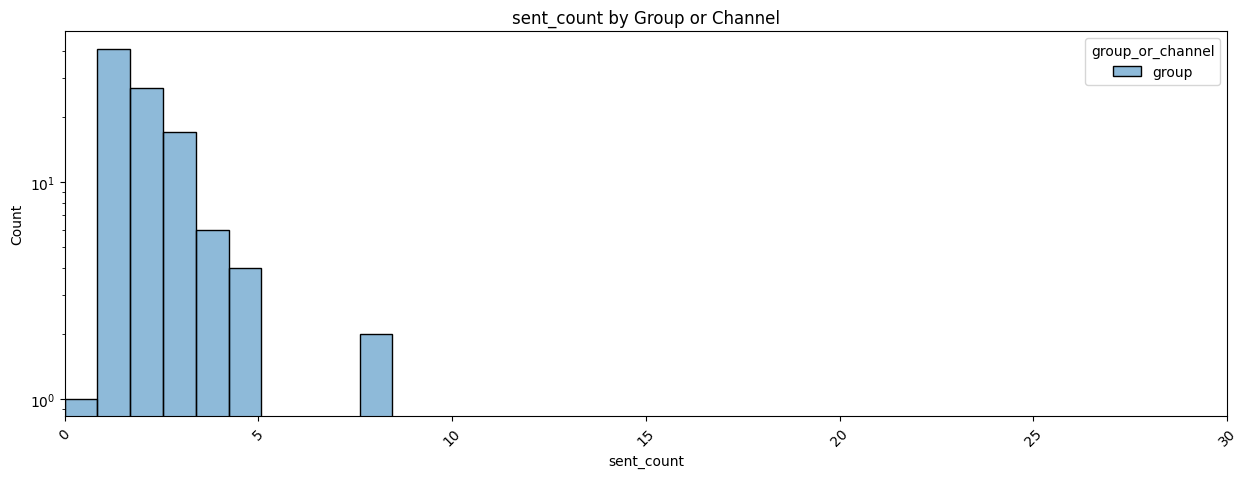

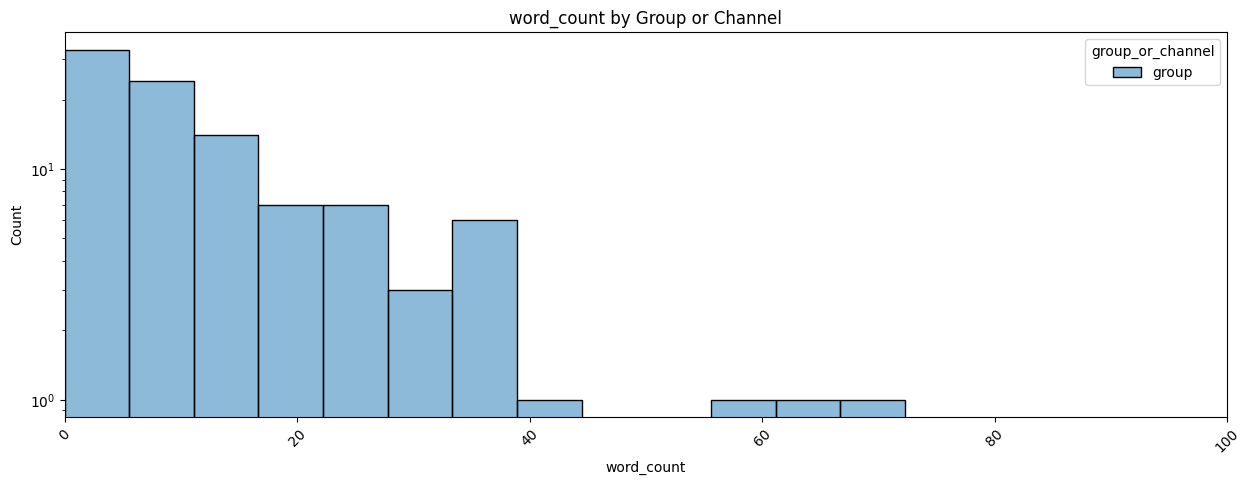

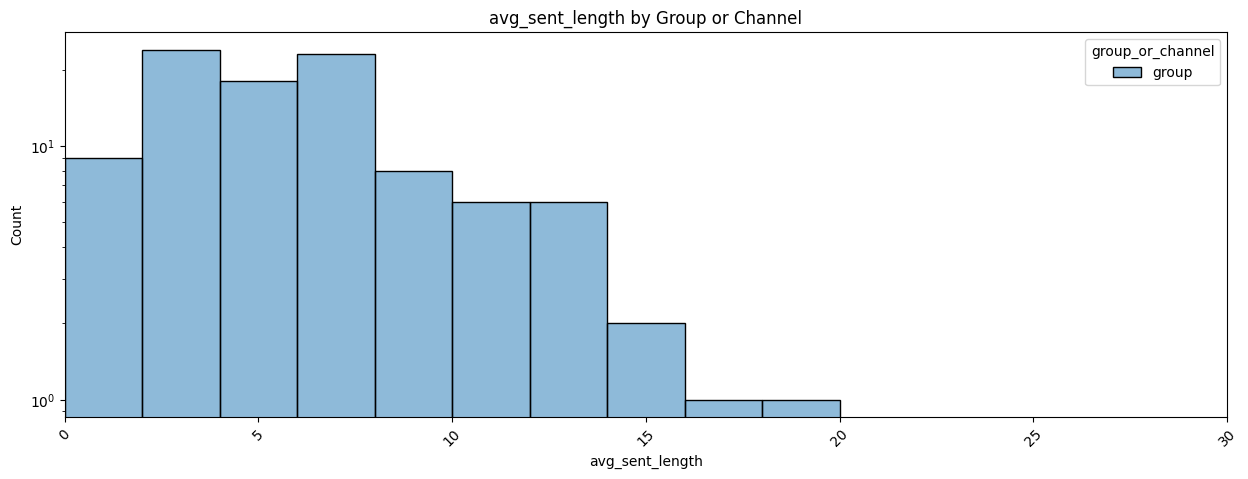

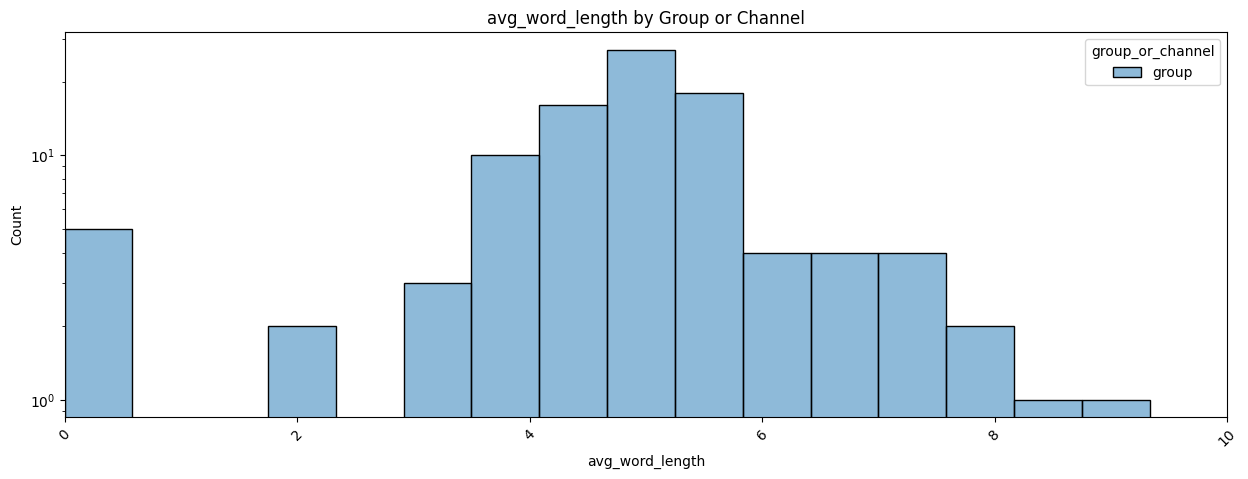

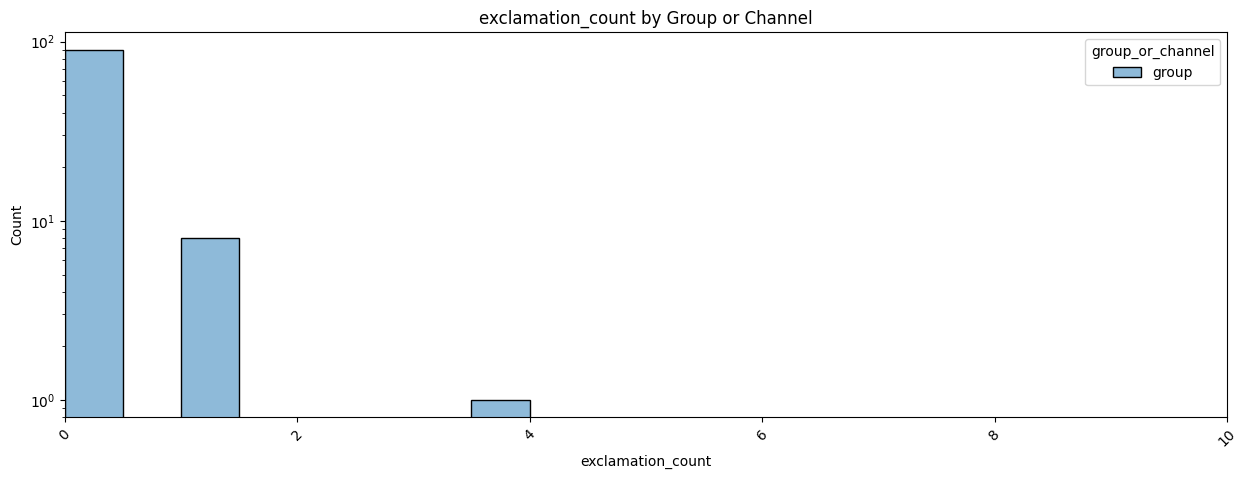

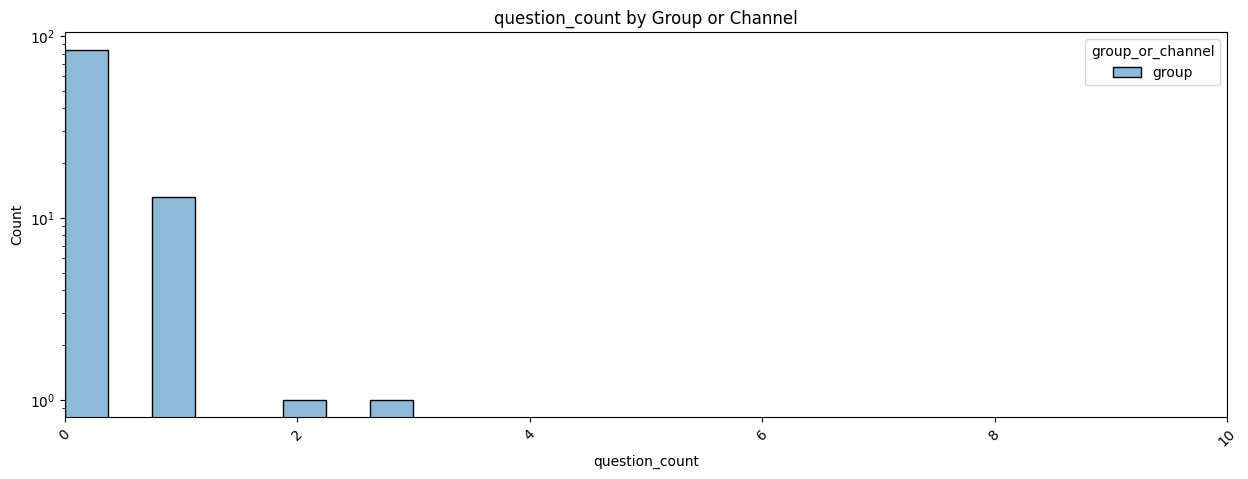

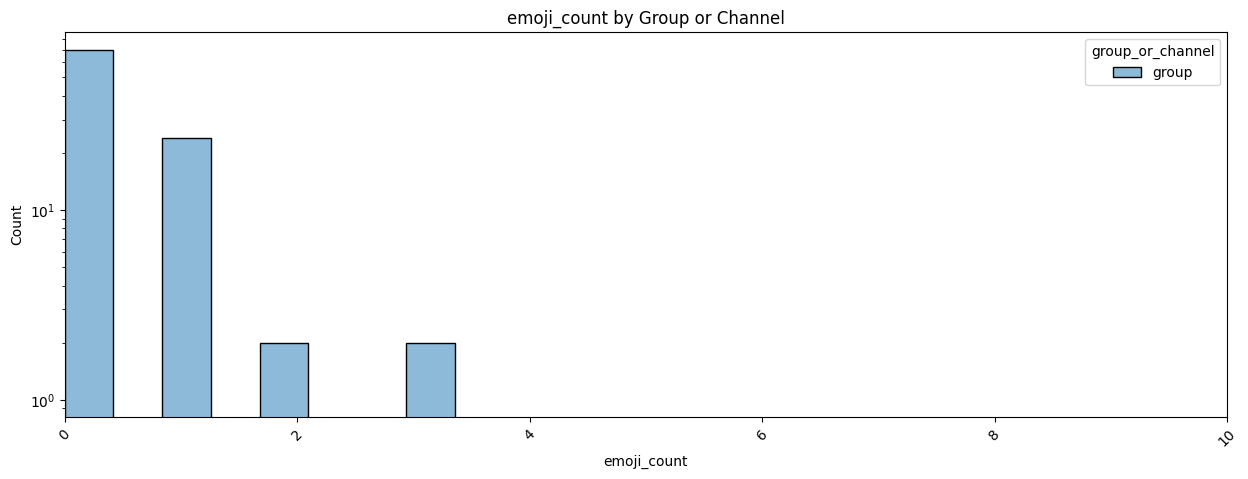

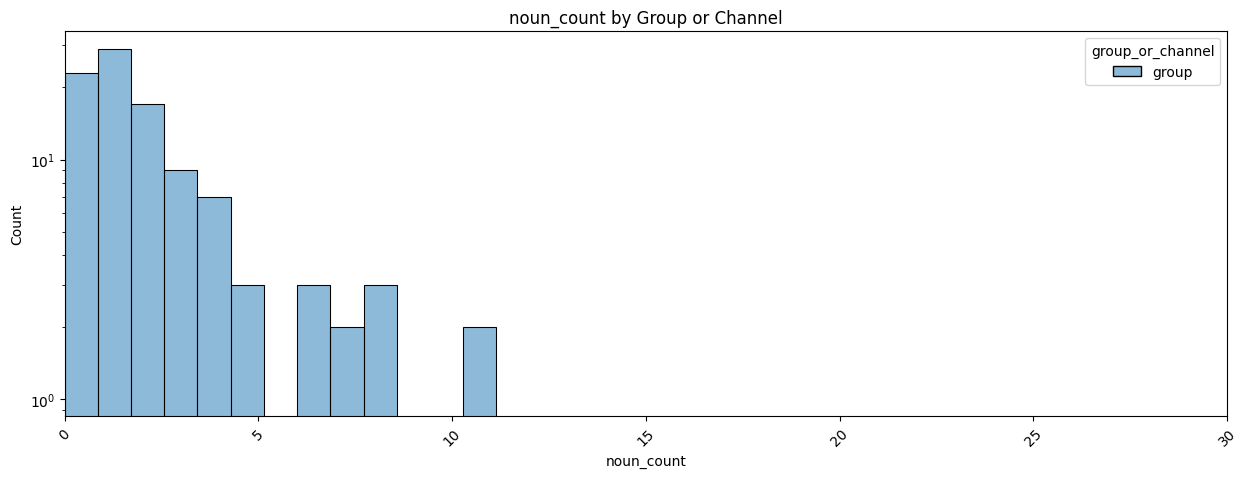

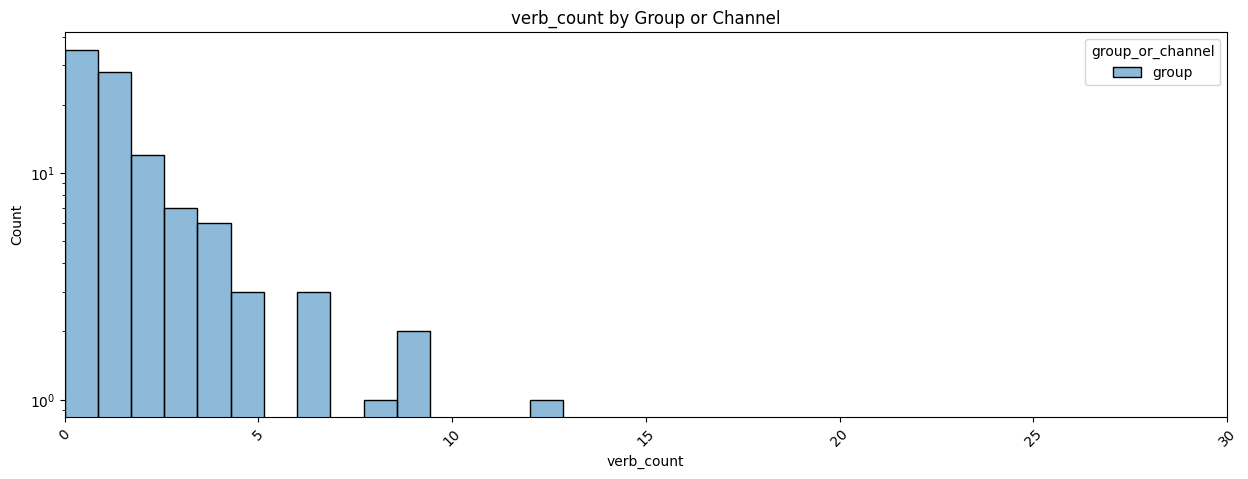

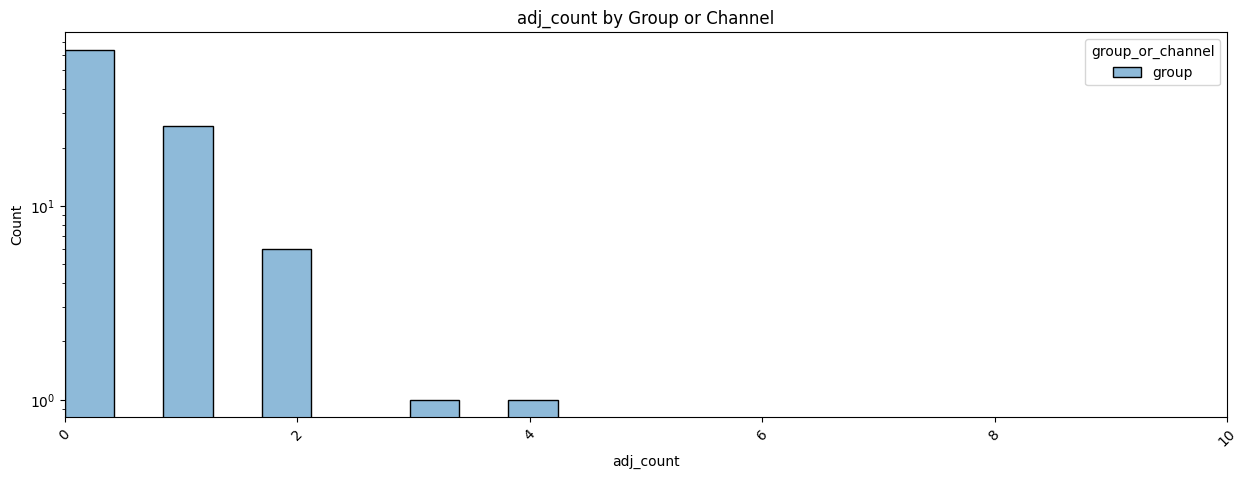

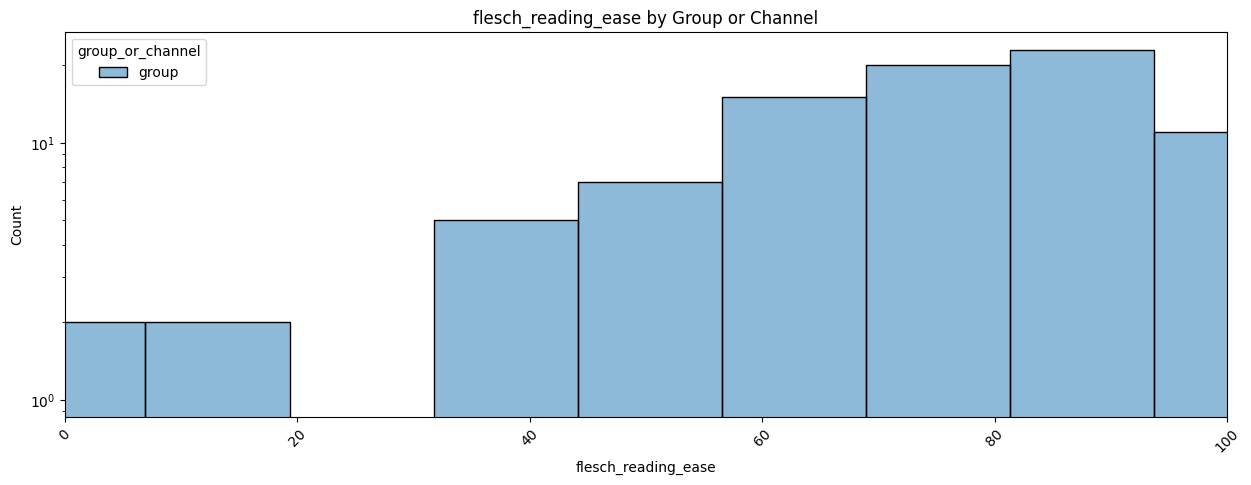

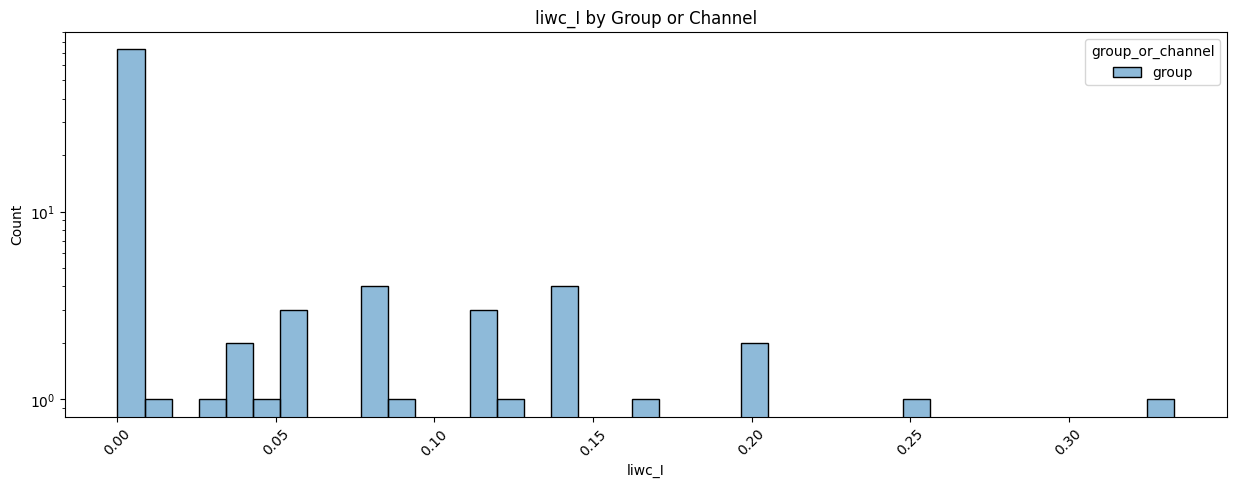

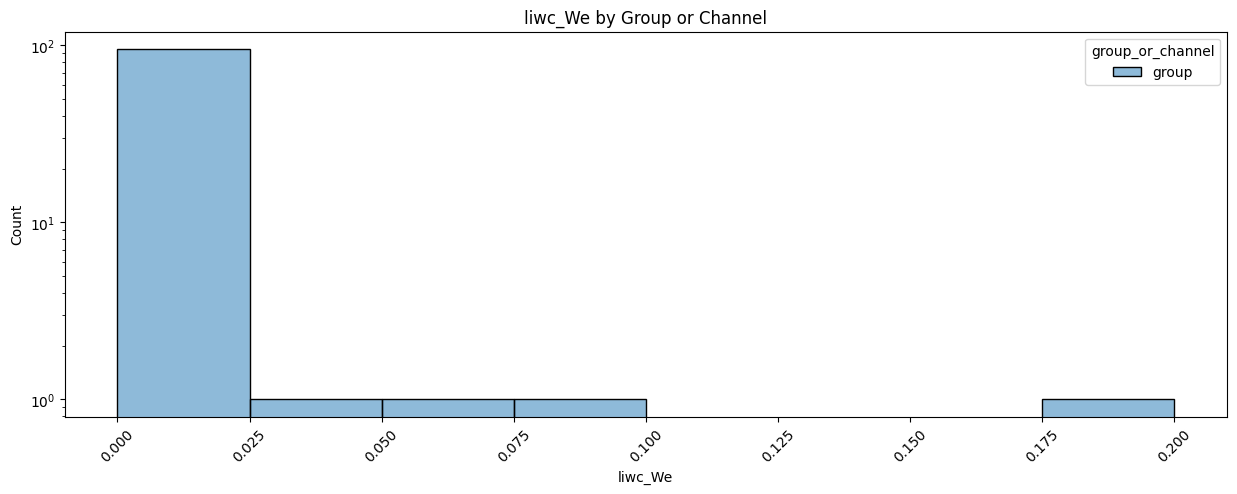

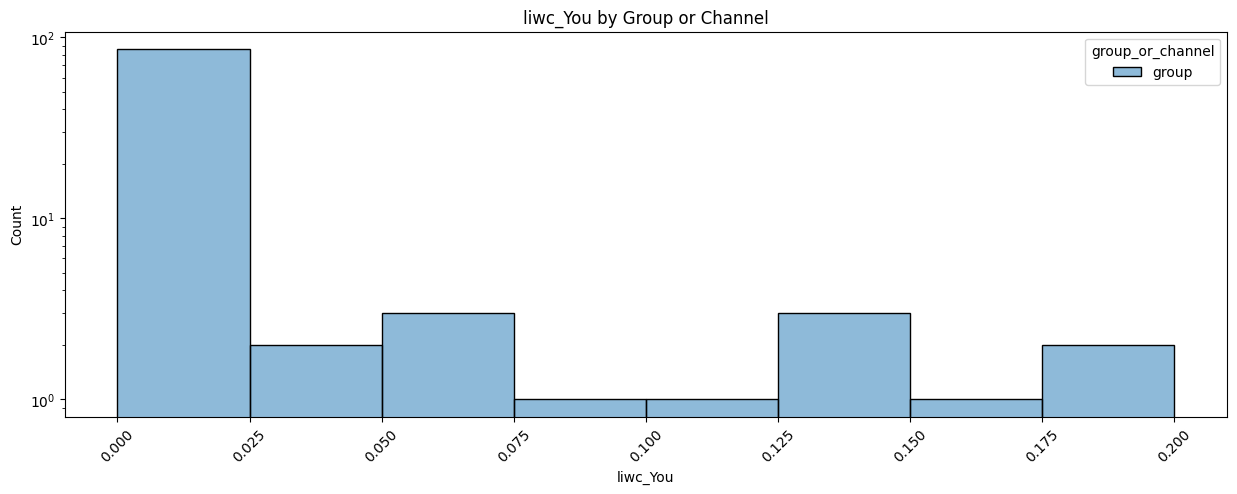

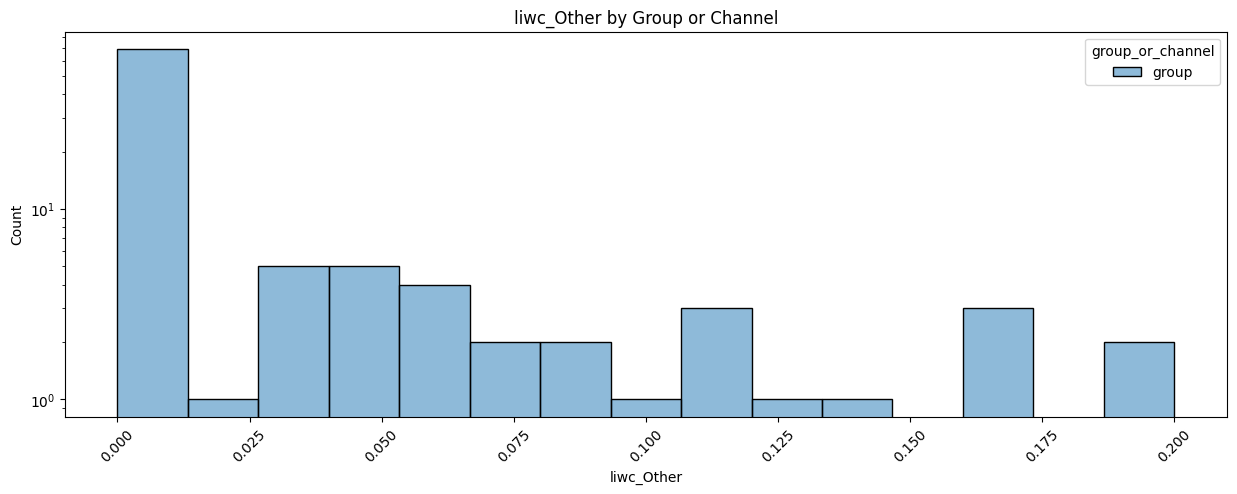

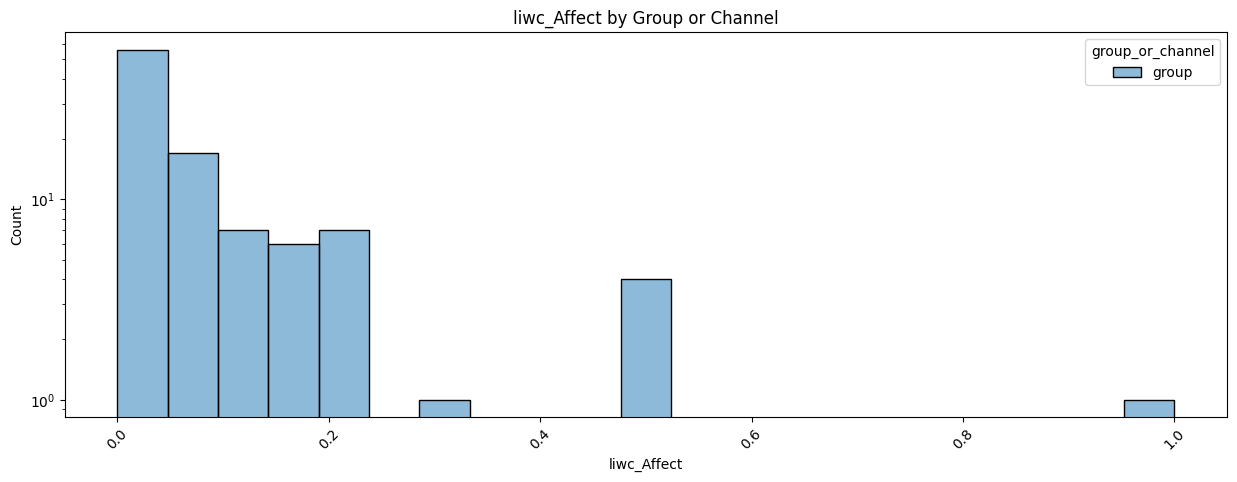

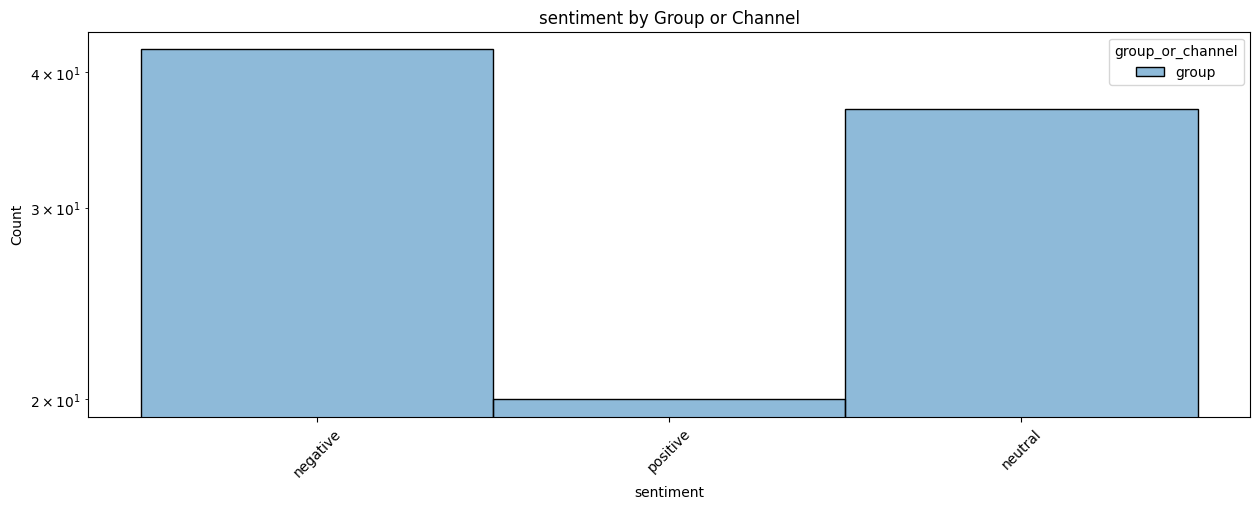

In [97]:
for col in cols:
    plt.figure(figsize=(15, 5))
    sns.histplot(data=plotting, x = col, hue='group_or_channel')
    plt.xticks(rotation=45)
    plt.title(f'{col} by Group or Channel')
    if col in ['sent_count', 'avg_sent_length', 'verb_count', 'noun_count']:
        plt.xlim(0,30)
    elif col in ['emoji_count', 'avg_word_length', 'adj_count', 'exclamation_count', 'question_count']:
        plt.xlim(0,10)
    elif col in ['flesch_reading_ease', 'word_count']:
        plt.xlim(0,100)
    plt.yscale('log')
    plt.show()

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


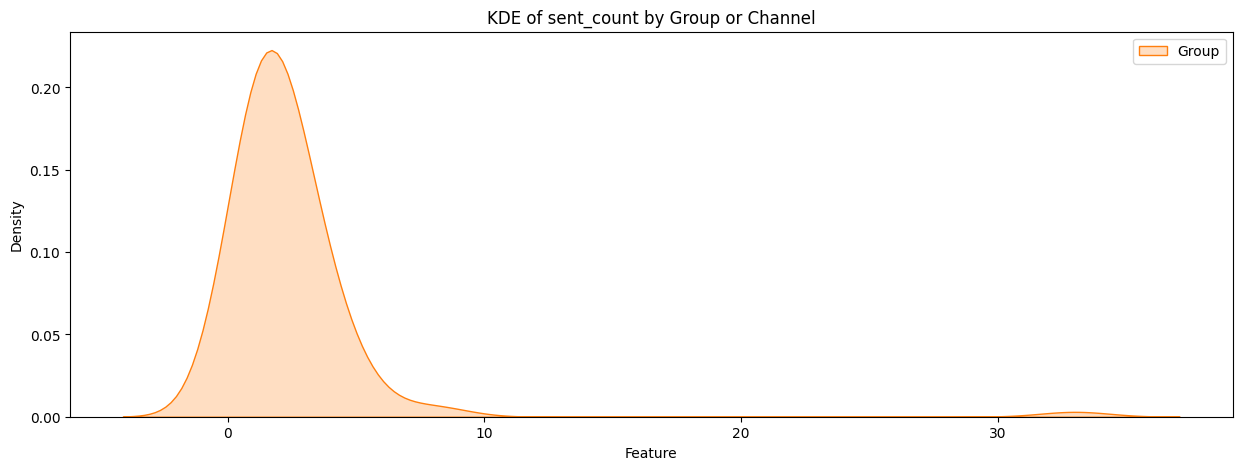

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


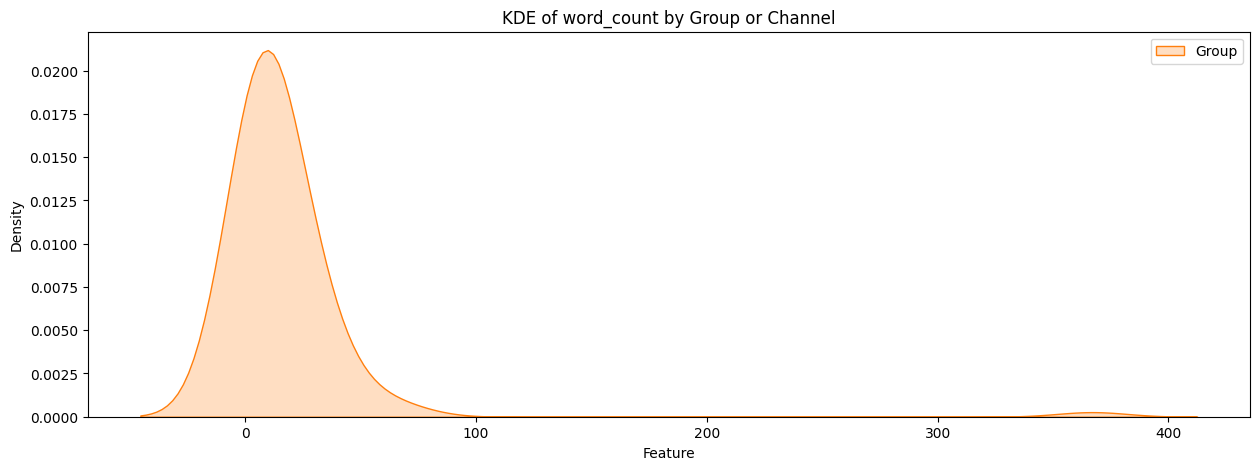

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


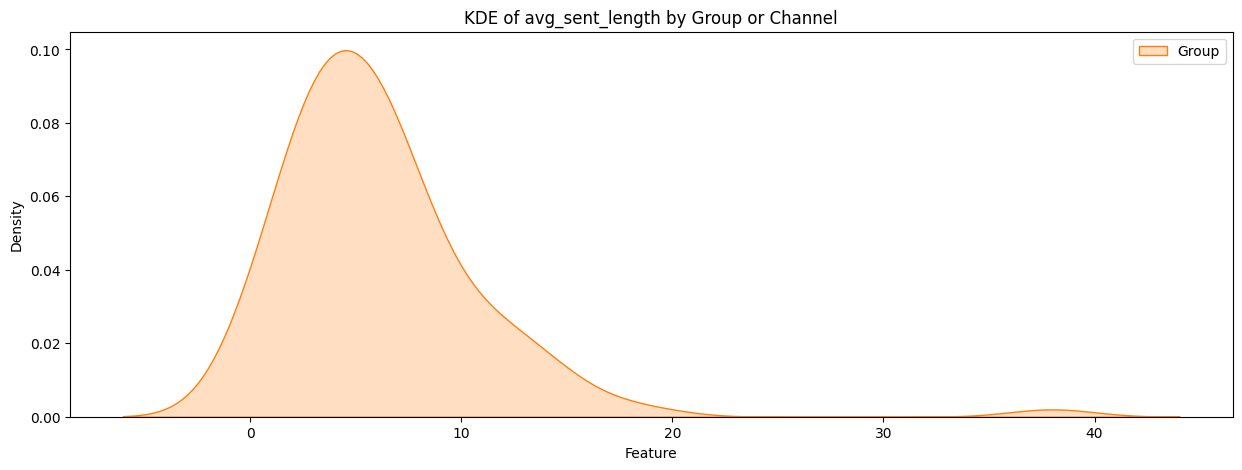

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


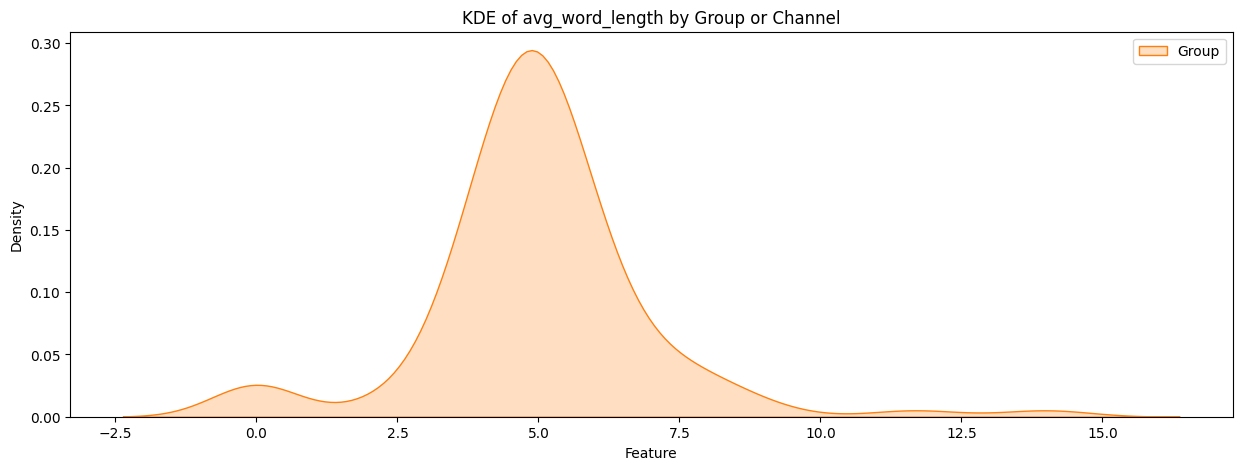

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


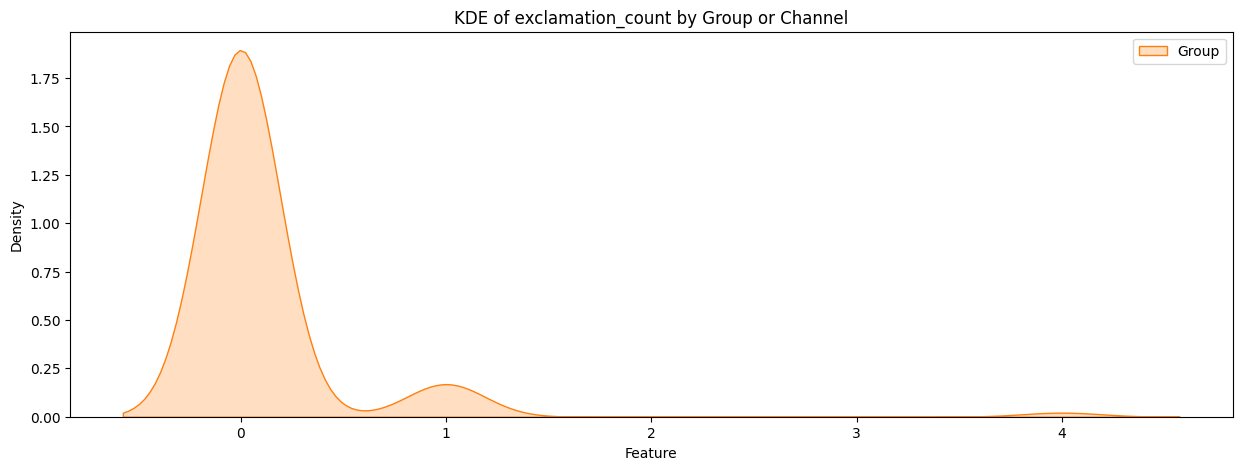

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


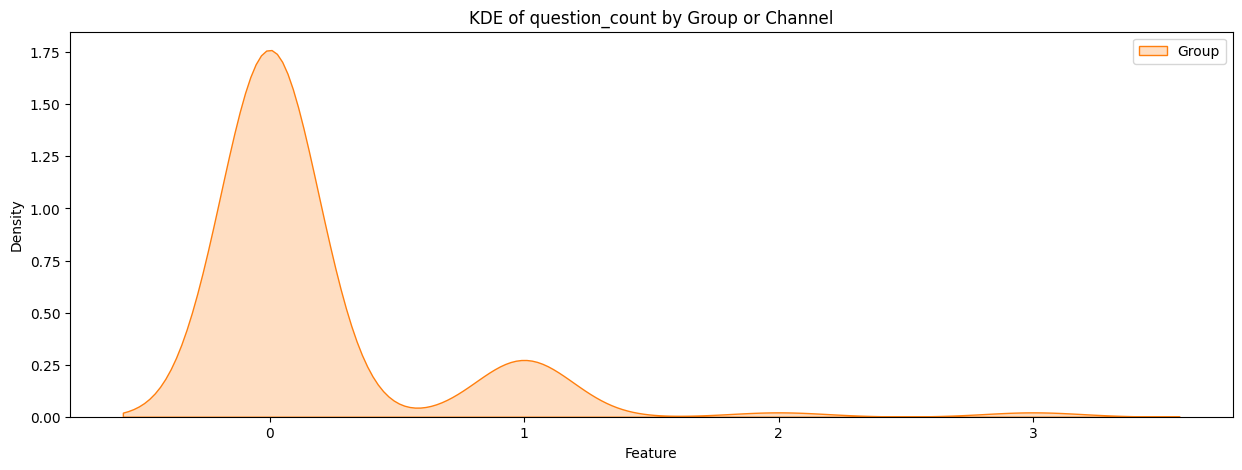

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


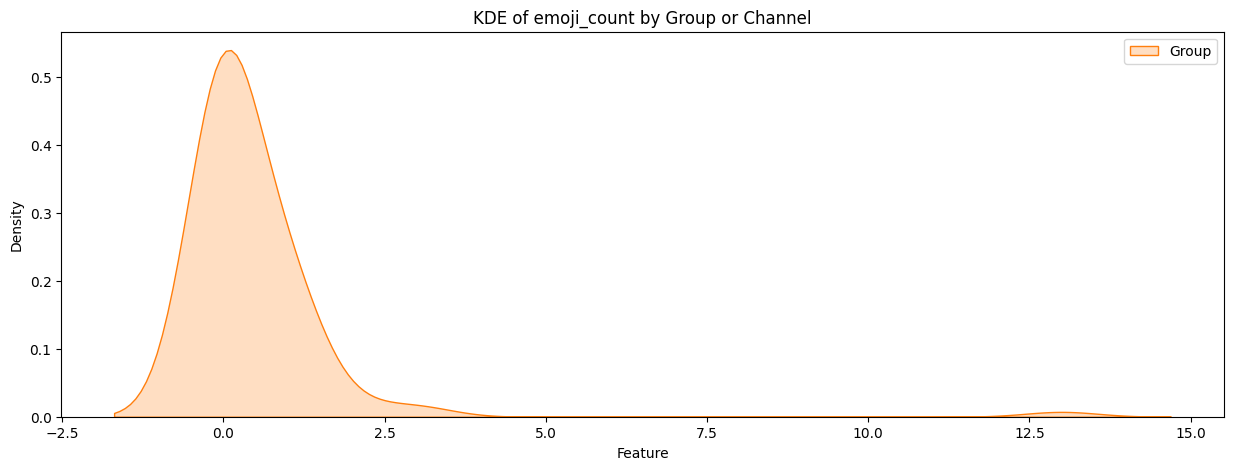

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


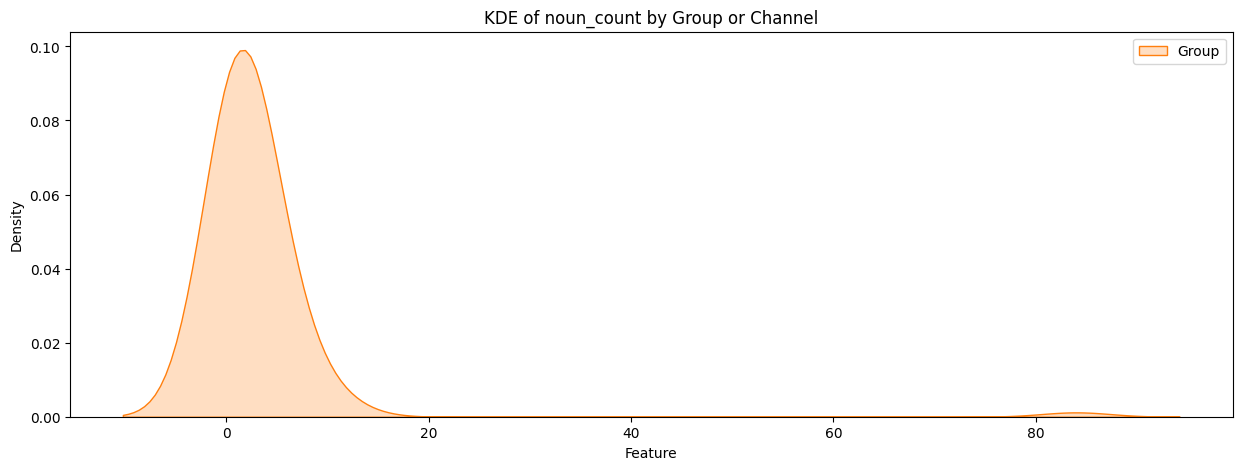

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


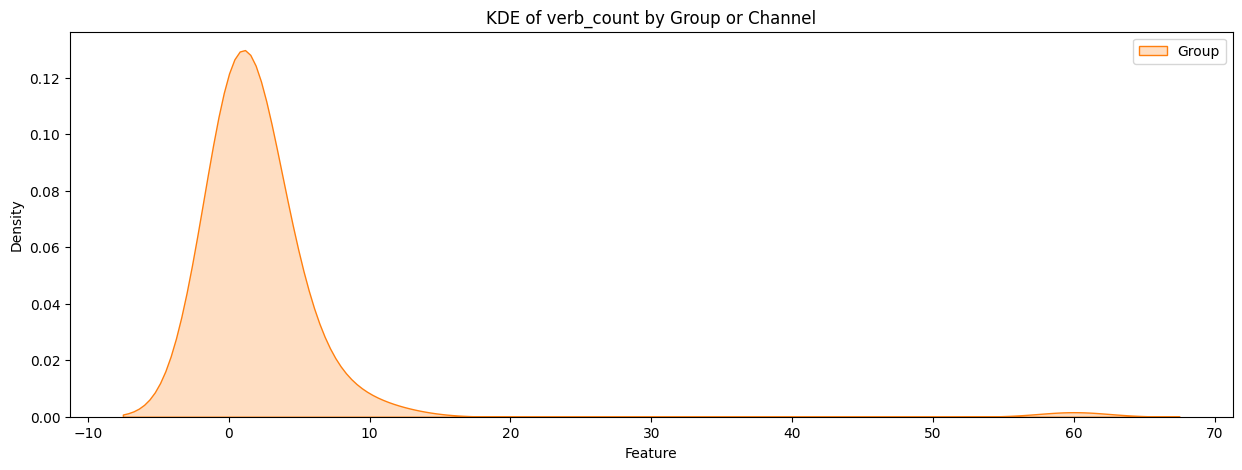

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


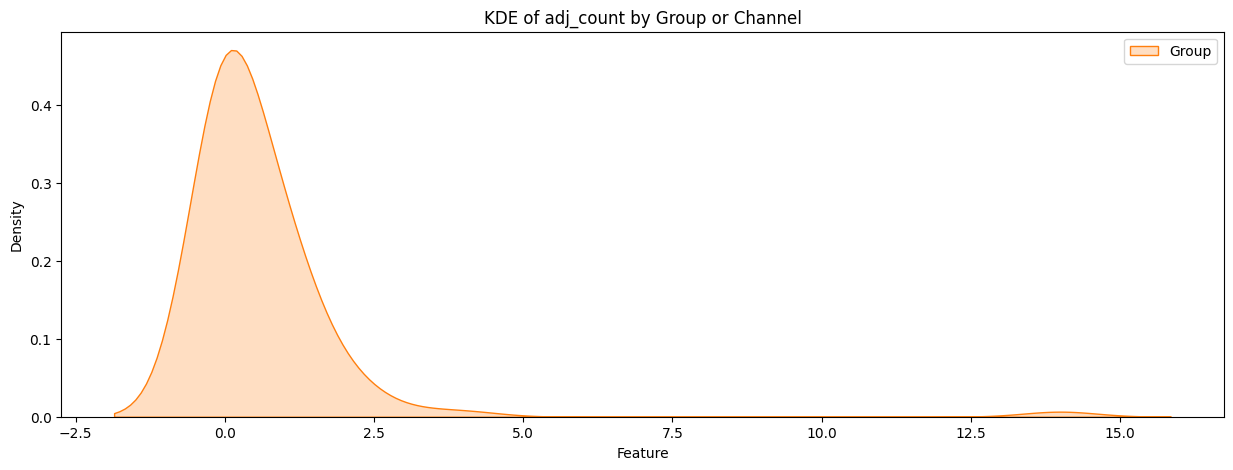

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


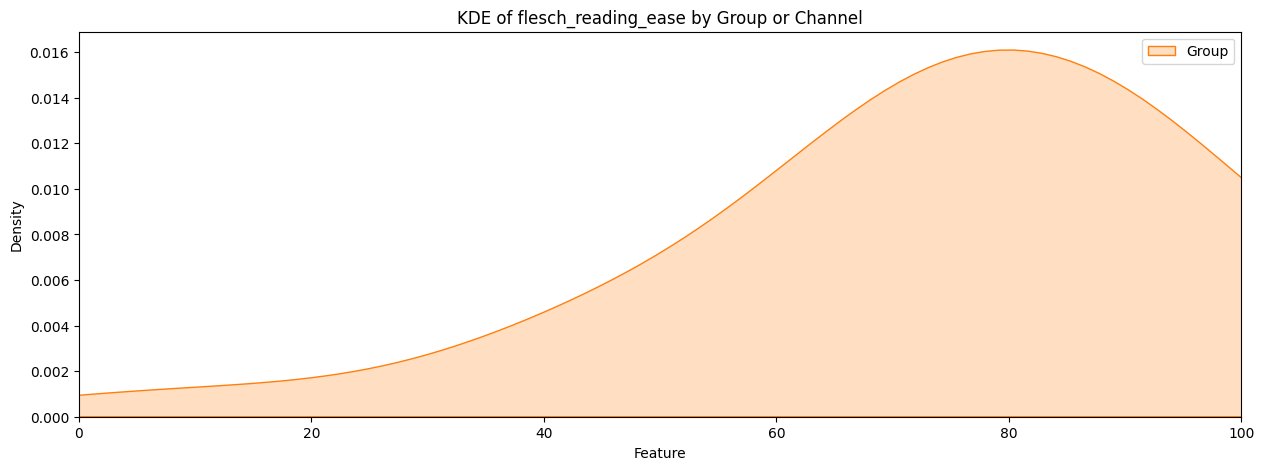

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


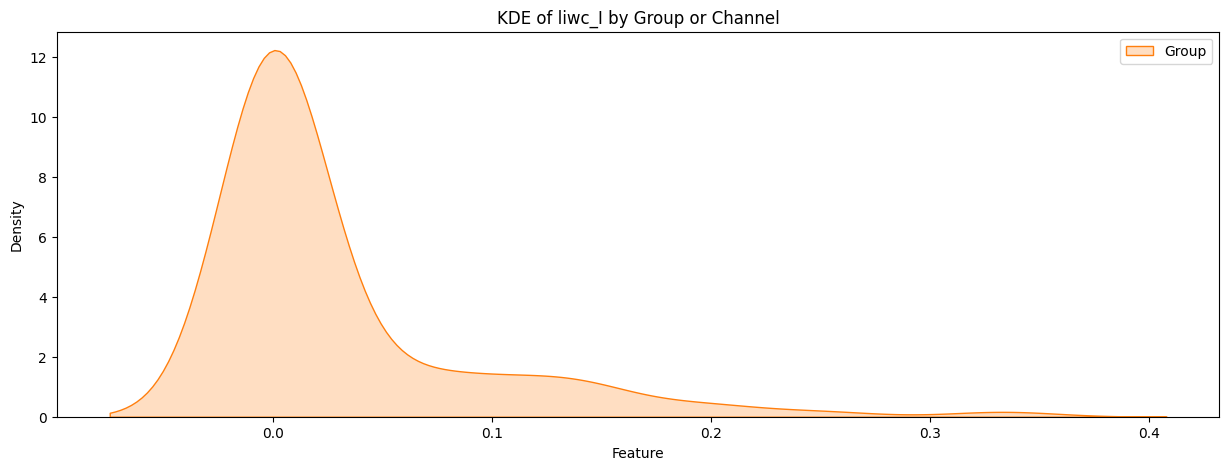

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


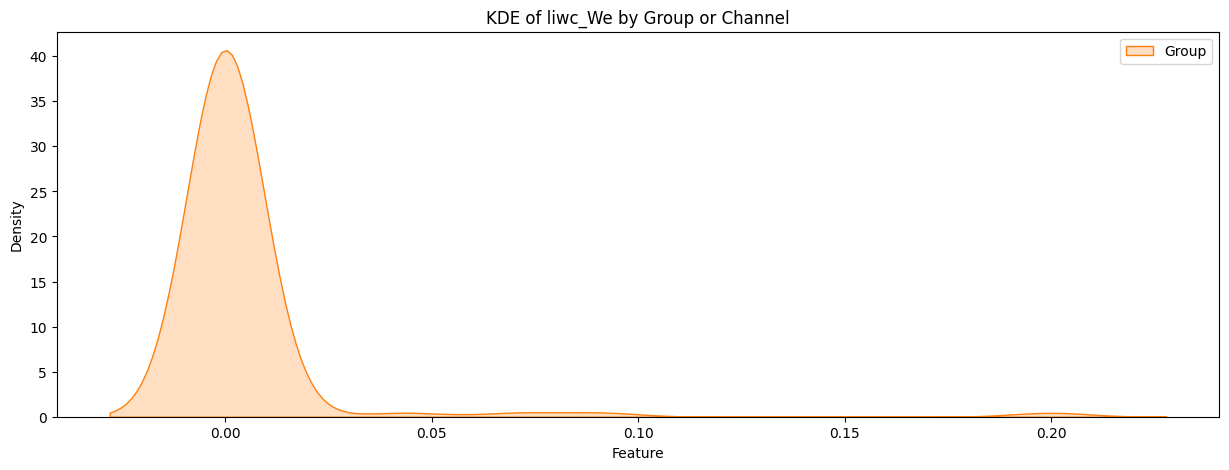

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


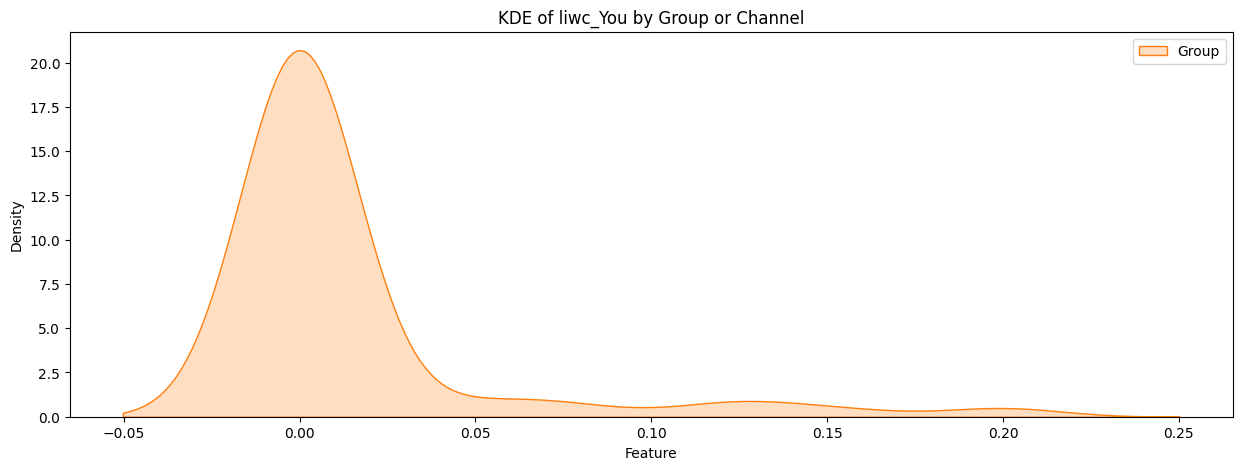

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


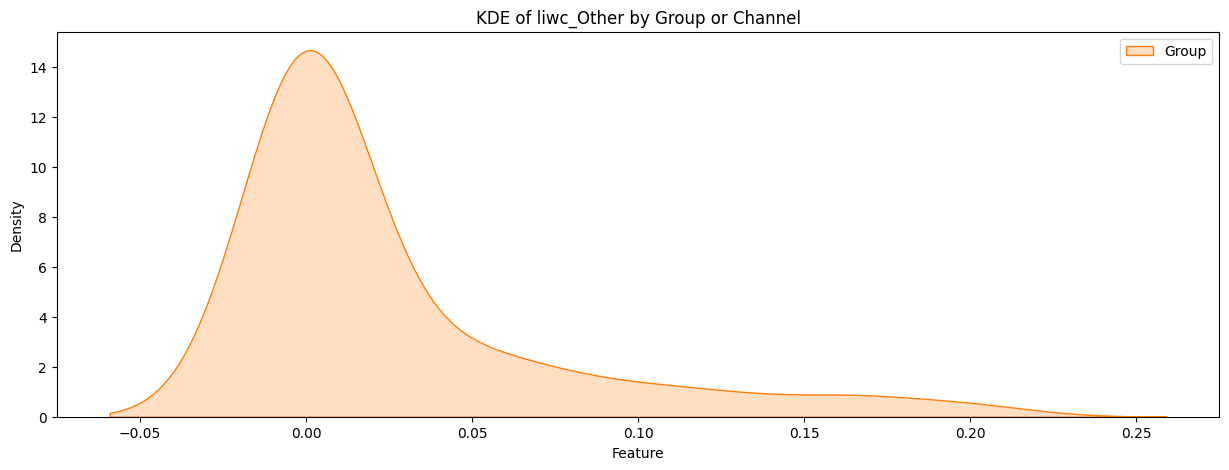

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(channels[col], label='Channel', shade=True)
/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/218601111.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(groups[col], label='Group', shade=True)


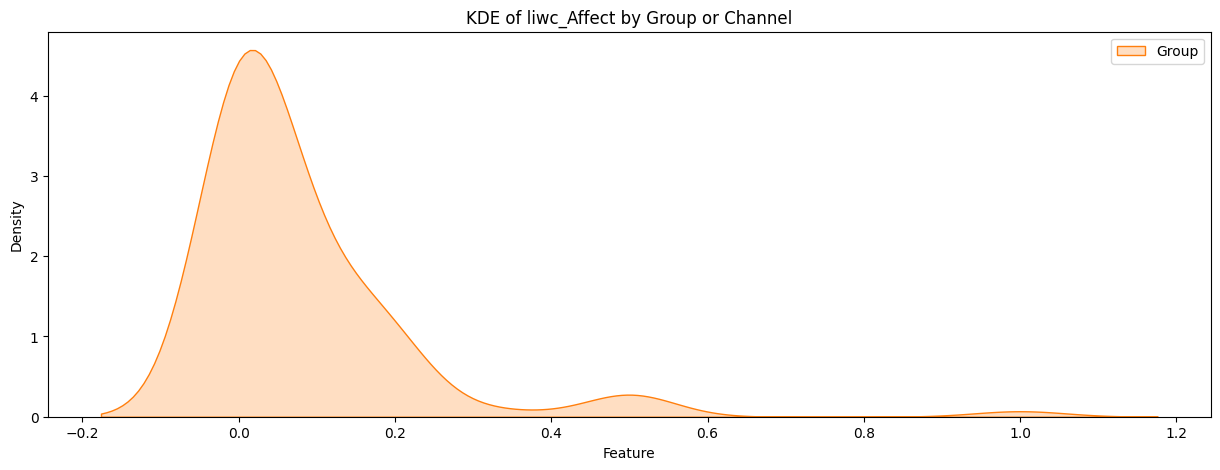

In [82]:
channels = plotting[plotting['group_or_channel'] == 'channel']
groups = plotting[plotting['group_or_channel'] == 'group']

#plot KDEs
for col in cols[:-1]:
    plt.figure(figsize=(15, 5))
    sns.kdeplot(channels[col], label='Channel', shade=True)
    sns.kdeplot(groups[col], label='Group', shade=True)
    plt.xlabel('Feature')
    plt.ylabel('Density')
    plt.title(f'KDE of {col} by Group or Channel')
    if col == 'flesch_reading_ease':
        plt.xlim(0,100)
    plt.legend()
    plt.show()

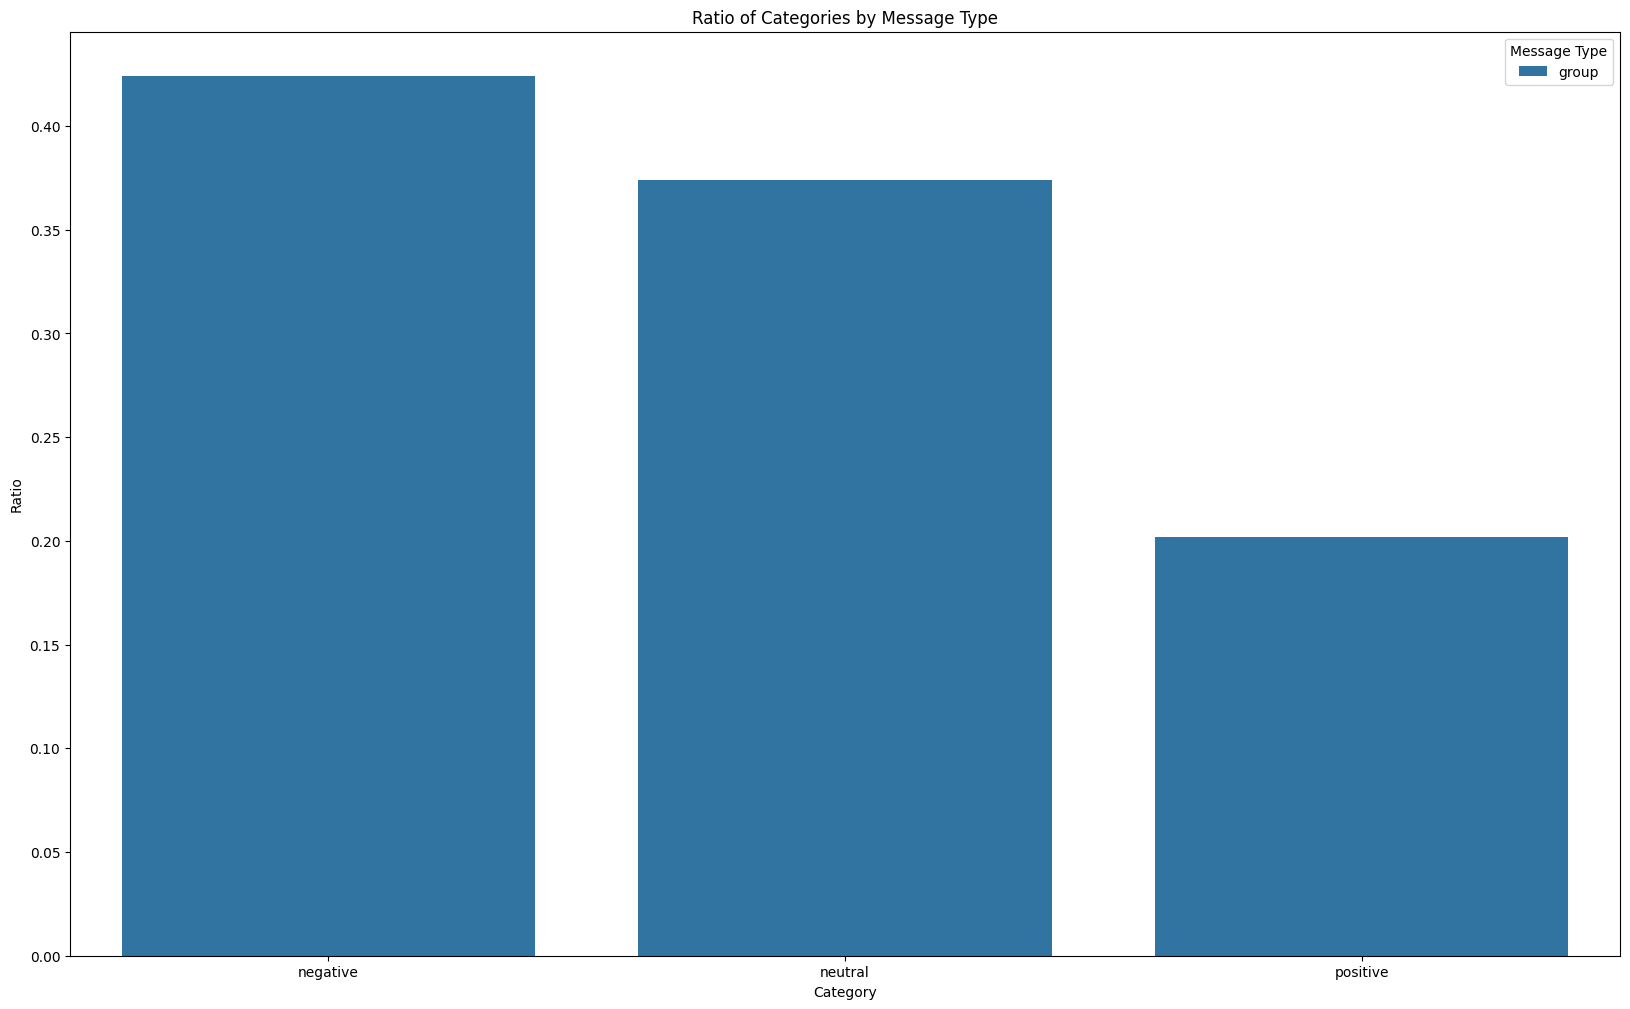

In [83]:
# Count total occurrences of each message type
groups = plotting[plotting['group_or_channel'] == 'group'].shape[0]
channels = plotting[plotting['group_or_channel'] == 'channel'].shape[0]

# Count occurrences of each category within each message type and normalize
category_group_counts = plotting[plotting['group_or_channel'] == 'group']['sentiment'].value_counts(normalize=True).reset_index()
category_channel_counts = plotting[plotting['group_or_channel'] == 'channel']['sentiment'].value_counts(normalize=True).reset_index()

# Rename columns for clarity
category_group_counts.columns = ['sentiment', 'ratio']
category_channel_counts.columns = ['sentiment', 'ratio']

# Add a column for message type
category_group_counts['group_or_channel'] = 'group'
category_channel_counts['group_or_channel'] = 'channel'

# Combine the data into a single DataFrame for plotting
category_ratios = pd.concat([category_group_counts, category_channel_counts])

# Plotting the ratio of each category using a bar plot
plt.figure(figsize=(20, 12))
sns.barplot(data=category_ratios, x='sentiment', y='ratio', hue='group_or_channel')
plt.title('Ratio of Categories by Message Type')
plt.xlabel('Category')
plt.ylabel('Ratio')
plt.legend(title='Message Type')
plt.show()

In [84]:
#create sample where flesch reading ease is less than 0 or greater than 100
flesch_scores = data[data['flesch_reading_ease_class'] == 'difficult']


for message in flesch_scores['final_message_string'][:50]:
    print(message + '\n' + '---' *50)

Die Grundaussage des Artikels ist, dass Attila sich zu der türkisch-faschistischen Bewegung die Grauen Wölfe bekennt. Außerdem ist ist er regelmäßig in eine Moschee gegangen, die als Islamisten Hotspot bekannt ist. 
------------------------------------------------------------------------------------------------------------------------------------------------------
Große Neuigkeiten - Aserbaidschan verhaftet offiziell die Täter von Kriegsverbrechen: Die Unteroffiziere Rashad Aliyev und Gardashkhan Abishov wurden verhaftet, weil sie armenische Soldaten im Rajon Zangilan verstümmelt haben. Die Soldaten Arzu Huseynov und Umid Aghayev, die Gräber von Armeniern im Dorf Madatli in Chodschawend geschändet haben, wurden ebenfalls verhaftet. Der Rest der Verbrechen wird noch untersucht: Haftbefehlsbeamte: 
------------------------------------------------------------------------------------------------------------------------------------------------------
Gestern hab ich erklär Bär gespielt keine

In [88]:
data[(data['group_or_channel'] == 'channel') & data['own_message'] == 1]

,UID_key,author,fwd_message,date,group_or_channel,own_message,forwarded_message,group_name,fwd_message_string,final_message,final_message_string
1195,115906712570569829299215,6.712571e+18,NaN,2021-05-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,"oh weia, neue Männer braucht das Land!!!!","oh weia, neue Männer braucht das Land!!!!"
1218,21326712570569829299215,6.712571e+18,NaN,2021-03-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,"<a href=""https://web.de/magazine/gesundheit/co...",nan
1253,46696712570569829299215,6.712571e+18,NaN,2021-04-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,Völkerrecht steht über BUNDESRECHT !!!,Völkerrecht steht über BUNDESRECHT !!!
1298,53756712570569829299215,6.712571e+18,NaN,2021-04-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,Was sagte Q immer? watch the water 😂😂😂😂,Was sagte Q immer? watch the water
1300,81706712570569829299215,6.712571e+18,NaN,2021-05-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,"<a href=""https://de.yahoo.com/nachrichten/verg...",nan
1315,134126712570569829299215,6.712571e+18,NaN,2021-06-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,💥💥💥💥💥 Auch jetzt beweist die Verschwörungsthe...,"Auch jetzt beweist die Verschwörungstheorie ,..."
1331,12756712570569829299215,6.712571e+18,NaN,2021-03-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,"Armes Deutschland, was ist bloß aus Deutschlan...","Armes Deutschland, was ist bloß aus Deutschlan..."
1355,110756712570569829299215,6.712571e+18,NaN,2021-05-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,"<a href=""https://www.bitchute.com/video/8CE1fW...",nan
1413,106426712570569829299215,6.712571e+18,NaN,2021-05-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,💥💥💥💥💥 Blutspenden,Blutspenden
1630,47776712570569829299215,6.712571e+18,NaN,2021-04-01,channel,1,0,Tagesereignisse der Offenbarung,NaN,FUNDSTÜCK:,FUNDSTÜCK:


# AWK Exploration

In [85]:
#load sample
data = pd.read_csv('../data/samples/messages_sample_2000.csv.gzip', compression='gzip').drop('Unnamed: 0', axis=1)
data['final_message_string'] = data['final_message_string'].astype(str)
data.head()

,UID_key,author,fwd_message,date,group_or_channel,own_message,forwarded_message,group_name,fwd_message_string,final_message,final_message_string
0,101673-8768690052625427881,6.151278e+18,NaN,2020-07-01,group,1,0,Deutschlandtreff 🇩🇪 Referendum für unsere Frei...,NaN,Das Völkerrecht hat eine Juristische Grundlage...,Das Völkerrecht hat eine Juristische Grundlage...
1,280125-2216795262304420685,-3.199383e+18,NaN,2021-02-01,group,1,0,Alles Ausser Mainstream Chat,NaN,"Danke, das macht Mut!🙏🏾","Danke, das macht Mut!"
2,321731-2216795262304420685,-5.728373e+18,NaN,2021-03-01,group,1,0,Alles Ausser Mainstream Chat,NaN,damit er dich besser sperren kann ....,damit er dich besser sperren kann ....
3,34147718200335715773759193,-3.182208e+18,NaN,2021-07-01,group,1,0,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",NaN,"Darf man Fragen, wie sich 82 Millionen Mensche...","Darf man Fragen, wie sich 82 Millionen Mensche..."
4,31042658200335715773759193,-7.008655e+18,NaN,2021-06-01,group,1,0,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",NaN,Dann ist ihm leider nicht zu helfen! Geht mir...,Dann ist ihm leider nicht zu helfen! Geht mir ...


In [86]:
#create new txt file and write final_message_string to it
#every messag ein new line, but delete \n characters
with open('../awk/own_test/messages_sample_2000.txt', 'w') as f:
    for message in data[(data['final_message_string'].notnull()) & (data['final_message_string'] != '')]['final_message_string']:
        f.write(message + '\n')

FileNotFoundError: [Errno 2] No such file or directory: '../awk/own_test/messages_sample_2000.txt'

In [ ]:
import re

def clean_text_file(input_file_path, output_file_path):
    #define the regular expression for the patterns to be removed
    pattern = re.compile(r'(^"|"$|""|\.|,|\!|\?|\:|\;|‘|"|\'|&|“|”|-|➡️|→|↓|http[a-zA-Z0-9:/=?._+&-]+|#[a-zA-Z0-9]+|@[a-zA-Z0-9:_\'’]+|…|\n|\r|\(|\)|NA|\*|<|>|„|/|\\|>>|^^)')
    
    
    with open(input_file_path, 'r') as file:
        lines = file.readlines()
    
    cleaned_lines = []
    for line in lines:
        #remove the unwanted patterns
        line = pattern.sub('', line)
        #replace multiple spaces with a single space
        line = re.sub(r'\s{2,}', ' ', line)
        #split, convert to lowercase, and join back
        words = line.split()
        cleaned_line = ' '.join(map(str.lower, words))
        cleaned_lines.append(cleaned_line)
    
    with open(output_file_path, 'w') as file:
        file.write('\n'.join(cleaned_lines))

#example usage
clean_text_file('../awk/own_test/messages_sample_2000.txt', '../awk/own_test/cleaned_messages_sample_2000.txt')

# Max' LIWC Dictionary Exploration

In [ ]:
liwc = pd.read_csv('../awk/own_test/liwc_german_long_all.txt', header=None,sep = '\t', names=['word', 'category', 'num of category'])

In [ ]:
liwc.head()

NameError: name 'liwc' is not defined

In [ ]:
categories = set(liwc['category'])
len(categories)

73

In [ ]:
categories

{'achieve',
 'adj',
 'adverb',
 'affect',
 'affiliation',
 'anger',
 'anx',
 'article',
 'assent',
 'auxverb',
 'bio',
 'body',
 'cause',
 'certain',
 'cogproc',
 'compare',
 'conj',
 'death',
 'differ',
 'discrep',
 'drives',
 'family',
 'feel',
 'female',
 'filler',
 'focusfuture',
 'focuspast',
 'focuspresent',
 'friend',
 'function',
 'health',
 'hear',
 'home',
 'i',
 'informal',
 'ingest',
 'insight',
 'interrog',
 'ipron',
 'leisure',
 'male',
 'money',
 'motion',
 'negate',
 'negemo',
 'netspeak',
 'nonflu',
 'number',
 'percept',
 'posemo',
 'power',
 'ppron',
 'prep',
 'pronoun',
 'quant',
 'relativ',
 'relig',
 'reward',
 'risk',
 'sad',
 'see',
 'sexual',
 'shehe',
 'social',
 'space',
 'swear',
 'tentat',
 'they',
 'time',
 'verb',
 'we',
 'work',
 'you'}

In [ ]:
len(set(liwc['word']))

18962

# LIWC 2007 Exploration

In [ ]:
liwc2007 = pd.read_csv('../data/liwc_german_2007.txt', sep='\t', names=['word', 'category', 'catnum'])
categories = set(liwc2007['category'])
categories

{'Achieve',
 'Affect',
 'Anger',
 'Anx',
 'Article',
 'Assent',
 'Body',
 'Cause',
 'Certain',
 'Cogmech',
 'Comm',
 'Death',
 'Discrep',
 'Down',
 'Eating',
 'Excl',
 'Family',
 'Feel',
 'Fillers',
 'Friends',
 'Future',
 'Groom',
 'Hear',
 'Home',
 'Humans',
 'I',
 'Incl',
 'Inhib',
 'Insight',
 'Job',
 'Leisure',
 'Metaph',
 'Money',
 'Motion',
 'Music',
 'Negate',
 'Negemo',
 'Nonfl',
 'Number',
 'Occup',
 'Optim',
 'Other',
 'Othref',
 'Past',
 'Physcal',
 'Posemo',
 'Posfeel',
 'Preps',
 'Present',
 'Pronoun',
 'Relig',
 'Sad',
 'School',
 'See',
 'Self',
 'Senses',
 'Sexual',
 'Sleep',
 'Social',
 'Space',
 'Sports',
 'Swear',
 'TV',
 'Tentat',
 'Time',
 'Up',
 'We',
 'You'}

In [ ]:
len(categories)

68

## LIWC Ratios Results

In [ ]:
pd.read_csv('../results/liwc_ratios_200.csv.gzip', compression='gzip')

,UID_key,liwc_Pronoun,liwc_I,liwc_We,liwc_Self,liwc_You,liwc_Other,liwc_Negate,liwc_Assent,liwc_Article,...,liwc_Physcal,liwc_Body,liwc_Sexual,liwc_Eating,liwc_Sleep,liwc_Groom,liwc_Swear,liwc_Nonfl,liwc_Fillers,Unnamed: 69
0,101673-8768690052625427881,1,0,0,0,0,0,1,0,4,...,0,0,0,0,0,0,0,0,0,NaN
1,280125-2216795262304420685,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
2,321731-2216795262304420685,2,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,34147718200335715773759193,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,31042658200335715773759193,6,4,0,4,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,45195-6525030231877560063,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
196,17635-2062537961599298253,5,0,0,0,1,5,3,0,32,...,4,4,0,0,0,0,0,0,0,NaN
197,37613-2062537961599298253,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
198,13867-666778652316300543,0,0,0,0,0,0,0,0,11,...,1,1,0,0,0,0,0,0,0,NaN


# Checking Columns for Aggregation

In [ ]:
check = pd.read_csv('../data/samples/messages_sample_2000.csv.gzip', compression='gzip')

In [ ]:
check['date']

0       0       2020.0\n1       2021.0\n2       2021.0...
1       0       2020.0\n1       2021.0\n2       2021.0...
2       0       2020.0\n1       2021.0\n2       2021.0...
3       0       2020.0\n1       2021.0\n2       2021.0...
4       0       2020.0\n1       2021.0\n2       2021.0...
                              ...                        
1995    0       2020.0\n1       2021.0\n2       2021.0...
1996    0       2020.0\n1       2021.0\n2       2021.0...
1997    0       2020.0\n1       2021.0\n2       2021.0...
1998    0       2020.0\n1       2021.0\n2       2021.0...
1999    0       2020.0\n1       2021.0\n2       2021.0...
Name: date, Length: 2000, dtype: object

In [ ]:
combined = pd.read_csv('../data/samples/messages_sample_200.csv.gzip', compression='gzip')

In [ ]:
combined.head()

,Unnamed: 0,UID_key,author,date,group_or_channel,own_message,forwarded_message,final_message,final_message_string
0,0,101673-8768690052625427881,6.151278e+18,2020.0-7.0,group,1,0,Das Völkerrecht hat eine Juristische Grundlage...,Das Völkerrecht hat eine Juristische Grundlage...
1,1,280125-2216795262304420685,-3.199383e+18,2021.0-2.0,group,1,0,"Danke, das macht Mut!🙏🏾","Danke, das macht Mut!"
2,2,321731-2216795262304420685,-5.728373e+18,2021.0-3.0,group,1,0,damit er dich besser sperren kann ....,damit er dich besser sperren kann ....
3,3,34147718200335715773759193,-3.182208e+18,2021.0-7.0,group,1,0,"Darf man Fragen, wie sich 82 Millionen Mensche...","Darf man Fragen, wie sich 82 Millionen Mensche..."
4,4,31042658200335715773759193,-7.008655e+18,2021.0-6.0,group,1,0,Dann ist ihm leider nicht zu helfen! Geht mir...,Dann ist ihm leider nicht zu helfen! Geht mir ...


In [ ]:
groups = pd.read_csv('../data/selected_groups_with_transcriptions.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_1934/4189901633.py:1: DtypeWarning: Columns (12,13,26,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  groups = pd.read_csv('../data/selected_groups_with_transcriptions.csv.gzip', compression='gzip')


In [ ]:
groups

,Unnamed: 0,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,...,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score
0,0,209982-6408240263544091615,0,209982.0,209982.0,Helfende Q Hände 👐👏,2021-11-09 22:50:15+00:00,Oki 😃,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,209983-6408240263544091615,1,209983.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:18+00:00,Von weiblich bis männlich,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,209984-6408240263544091615,2,209984.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:23+00:00,Von direkt zu zurückhaltend,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,209985-6408240263544091615,3,209985.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:28+00:00,Wie bei WOW,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,209986-6408240263544091615,4,209986.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:47+00:00,Neuer Charakter und XP sammeln,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077716,4307447,23042104945287925667135,4077377,NaN,NaN,5G - ein Verbrechen?! Gibt es chemtrails??,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4077717,4307448,23180104945287925667135,4077378,NaN,NaN,5G - ein Verbrechen?! Gibt es chemtrails??,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4077718,4307449,23198104945287925667135,4077379,NaN,NaN,5G - ein Verbrechen?! Gibt es chemtrails??,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4077719,4307450,23213104945287925667135,4077380,NaN,NaN,5G - ein Verbrechen?! Gibt es chemtrails??,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploration of Post-Aggregation Results

In [ ]:
post_agg = pd.read_csv('../results/post-aggregation/author_group_20000.csv.gzip', compression='gzip')

In [ ]:
#display all columns
pd.set_option('display.max_columns', None)

In [ ]:
post_agg.describe()

,author,noun_count,verb_count,adj_count,positive_sentiment,negative_sentiment,neutral_sentiment,channel_messages,group_messages,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,flesch_reading_ease,liwc_I,liwc_We,liwc_You,liwc_Other,liwc_Affect,fwd_message,fwd_message_string,own_message,forwarded_message,total_message_count,own_message_count,action_quotient,sentiment_quotient
count,4.705000e+03,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4319.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,0.0,0.0,4705.000000,4705.000000,4705.000000,4705.000000,1859.000000,2427.000000
mean,2.196713e+16,6.512154,4.162047,1.279318,0.202626,0.424784,0.320859,0.000213,0.999787,2.516682,18.306703,6.027095,4.693458,0.194931,0.205327,0.398352,73.874647,0.027805,0.006697,0.014303,0.025713,0.061400,NaN,NaN,0.996415,0.001063,4.251647,2.148565,2.873286,0.187489
std,5.320439e+18,26.751727,11.045388,5.173057,0.365822,0.452783,0.428493,0.014602,0.014602,2.533340,32.417776,5.406946,1.867164,0.647086,0.509608,0.890996,30.056361,0.056850,0.024752,0.041941,0.049167,0.116749,NaN,NaN,0.057651,0.032585,92.546298,4.855899,2.743170,0.474246
min,-9.221881e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-523.010000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,-4.597388e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.287879,2.666667,4.254514,0.000000,0.000000,0.000000,62.200000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,-2.135458e+15,2.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,1.000000,2.000000,10.000000,5.000000,4.987171,0.000000,0.000000,0.000000,75.800000,0.000000,0.000000,0.000000,0.000000,0.017857,NaN,NaN,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,4.557305e+18,5.000000,4.000000,1.000000,0.250000,1.000000,1.000000,0.000000,1.000000,3.000000,20.000000,8.000000,5.573307,0.000000,0.000000,1.000000,89.100000,0.033333,0.000000,0.000000,0.034483,0.077280,NaN,NaN,1.000000,0.000000,2.000000,2.000000,4.000000,0.000000
max,9.206001e+18,1237.000000,331.000000,196.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,568.000000,109.000000,21.000000,18.000000,9.000000,24.000000,180.000000,0.500000,0.333333,0.500000,0.500000,1.000000,NaN,NaN,1.000000,1.000000,5822.000000,124.000000,26.000000,5.000000


In [ ]:
agg = pd.read_csv('../data/aggregated/author_group_20000.csv.gzip', compression='gzip')

In [ ]:
agg.describe()

,author,noun_count,verb_count,adj_count,positive_sentiment,negative_sentiment,neutral_sentiment,channel_messages,group_messages,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,flesch_reading_ease,liwc_I,liwc_We,liwc_You,liwc_Other,liwc_Affect,fwd_message,fwd_message_string,own_message,forwarded_message,total_message_count
count,4.705000e+03,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4319.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,0.0,0.0,4705.000000,4705.000000,4705.000000
mean,2.196713e+16,6.512154,4.162047,1.279318,0.455437,0.893177,0.710661,0.026439,2.128998,2.516682,18.306703,6.027095,4.693458,0.194931,0.205327,0.398352,73.874647,0.027805,0.006697,0.014303,0.025713,0.061400,NaN,NaN,2.148565,2.099044,4.251647
std,5.320439e+18,26.751727,11.045388,5.173057,1.176219,2.022031,2.378745,1.810653,4.524876,2.533340,32.417776,5.406946,1.867164,0.647086,0.509608,0.890996,30.056361,0.056850,0.024752,0.041941,0.049167,0.116749,NaN,NaN,4.855899,92.467484,92.546298
min,-9.221881e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-523.010000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,-4.597388e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.287879,2.666667,4.254514,0.000000,0.000000,0.000000,62.200000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000
50%,-2.135458e+15,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,10.000000,5.000000,4.987171,0.000000,0.000000,0.000000,75.800000,0.000000,0.000000,0.000000,0.000000,0.017857,NaN,NaN,1.000000,0.000000,1.000000
75%,4.557305e+18,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,20.000000,8.000000,5.573307,0.000000,0.000000,1.000000,89.100000,0.033333,0.000000,0.000000,0.034483,0.077280,NaN,NaN,2.000000,0.000000,2.000000
max,9.206001e+18,1237.000000,331.000000,196.000000,23.000000,52.000000,81.000000,124.000000,98.000000,33.000000,568.000000,109.000000,21.000000,18.000000,9.000000,24.000000,180.000000,0.500000,0.333333,0.500000,0.500000,1.000000,NaN,NaN,124.000000,5822.000000,5822.000000


In [ ]:
pre_agg = pd.read_csv(f'../results/pre-aggregation/liwcANDfeatures_results_20000.csv.gzip', compression='gzip')

In [ ]:
pre_agg.describe()

,author,own_message,forwarded_message,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,noun_count,verb_count,adj_count,flesch_reading_ease,positive_sentiment,negative_sentiment,neutral_sentiment,liwc_I,liwc_We,liwc_You,liwc_Other,liwc_Affect
count,2.000400e+04,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,9076.000000,9677.000000,9677.000000,9677.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000
mean,-2.275386e+18,0.505349,0.493701,1.265447,9.184613,3.010000,2.376356,0.096781,0.099630,0.220506,1.549940,0.997451,0.305189,74.303725,0.220833,0.433709,0.345458,0.013501,0.003420,0.008172,0.012437,0.031134
std,4.731893e+18,0.499984,0.499973,2.466964,27.044633,5.116648,2.788193,0.489587,0.419637,0.725836,5.180823,2.911679,1.318116,31.300700,0.414830,0.495612,0.475542,0.046801,0.021765,0.036308,0.039575,0.099136
min,-9.221881e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-523.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.525030e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.062538e+18,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.341604e+17,1.000000,1.000000,2.000000,9.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,90.250000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.206001e+18,1.000000,1.000000,88.000000,613.000000,131.500000,41.000000,18.000000,17.000000,24.000000,170.000000,86.000000,51.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,1.000000


In [ ]:
pre_agg = pd.read_csv(f'../results/pre-aggregation/messages_with_features_200.csv.gzip', compression='gzip')

In [ ]:
pre_agg.head()

,Unnamed: 0,UID_key,author,fwd_message,date,group_or_channel,own_message,forwarded_message,group_name,fwd_message_string,final_message,final_message_string,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,noun_count,verb_count,adj_count,flesch_reading_ease,flesch_reading_ease_class,positive_sentiment,negative_sentiment,neutral_sentiment
0,0,101673-8768690052625427881,6.151278e+18,NaN,2020.0-7.0,group,1,0,Deutschlandtreff 🇩🇪 Referendum für unsere Frei...,NaN,Das Völkerrecht hat eine Juristische Grundlage...,Das Völkerrecht hat eine Juristische Grundlage...,3,29,9.666667,5.379310,0,0,0,7,3,2,71.90,fairly easy,0.0,1.0,0.0
1,1,280125-2216795262304420685,-3.199383e+18,NaN,2021.0-2.0,group,1,0,Alles Ausser Mainstream Chat,NaN,"Danke, das macht Mut!🙏🏾","Danke, das macht Mut!",2,4,2.000000,4.500000,1,0,1,2,1,0,99.95,very easy,1.0,0.0,0.0
2,2,321731-2216795262304420685,-5.728373e+18,NaN,2021.0-3.0,group,1,0,Alles Ausser Mainstream Chat,NaN,damit er dich besser sperren kann ....,damit er dich besser sperren kann ....,2,6,3.000000,5.333333,0,0,0,0,1,0,86.25,easy,0.0,1.0,0.0
3,3,34147718200335715773759193,-3.182208e+18,NaN,2021.0-7.0,group,1,0,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",NaN,"Darf man Fragen, wie sich 82 Millionen Mensche...","Darf man Fragen, wie sich 82 Millionen Mensche...",3,18,6.000000,6.611111,1,1,0,5,2,1,54.00,fairly difficult,0.0,0.0,1.0
4,4,31042658200335715773759193,-7.008655e+18,NaN,2021.0-6.0,group,1,0,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",NaN,Dann ist ihm leider nicht zu helfen! Geht mir...,Dann ist ihm leider nicht zu helfen! Geht mir ...,8,35,4.375000,5.057143,1,0,0,3,8,0,85.25,easy,0.0,1.0,0.0


# Dataset incl Fwd Messages

In [4]:
groups_ohne = pd.read_csv('../data/selected_groups_with_transcriptions.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_28894/3915665993.py:1: DtypeWarning: Columns (12,13,26,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  groups_ohne = pd.read_csv('../data/selected_groups_with_transcriptions.csv.gzip', compression='gzip')


In [5]:
groups_fwd = pd.read_csv('../data/selected_groups_only_fwd.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_28894/1274296344.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  groups_fwd = pd.read_csv('../data/selected_groups_only_fwd.csv.gzip', compression='gzip')


In [6]:
groups_ohne.columns

Index(['Unnamed: 0', 'UID_key', 'initial_ID', 'mid_message', 'mid_file',
       'group_name', 'posting_date', 'message', 'fwd_message',
       'fwd_posting_date_message', 'posting_date_file', 'link_url',
       'media_file', 'media_file_type', 'fwd_posting_date_file',
       'fwd_link_url', 'fwd_media_file', 'fwd_media_file_type', 'author',
       'fwd_author', 'day', 'week', 'weekday', 'message_hash',
       'fwd_message_hash', 'website', 'replied_to', 'year', 'month',
       'day_of_year', 'duration', 'filepath', 'filename', 'filename_if_joined',
       'transcribed_message', 'newsguard_domain', 'newsguard_score'],
      dtype='object')

In [7]:
groups_fwd.columns

Index(['Unnamed: 0', 'UID_key', 'group_name', 'posting_date', 'fwd_message',
       'fwd_posting_date_message', 'posting_date_file', 'link_url',
       'media_file', 'media_file_type', 'fwd_posting_date_file',
       'fwd_link_url', 'fwd_media_file', 'fwd_media_file_type', 'author',
       'fwd_author', 'message_hash', 'fwd_message_hash', 'website',
       'replied_to'],
      dtype='object')

In [8]:
groups_fwd.head(5)

,Unnamed: 0,UID_key,group_name,posting_date,fwd_message,fwd_posting_date_message,posting_date_file,link_url,media_file,media_file_type,fwd_posting_date_file,fwd_link_url,fwd_media_file,fwd_media_file_type,author,fwd_author,message_hash,fwd_message_hash,website,replied_to
0,36562,3414834-7702977790775184843,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:22:33+00:00,💥New Flyer: Europa - The Last Battle💥 We welc...,27.07.2021 16:01:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.092283e+18,-6.606542e+18,NaN,4.671316e+18,NaN,NaN
1,36563,3414844-7702977790775184843,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:24:29+00:00,Karl Lauterbach bestätigt gleich zwei angeblic...,27.07.2021 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.896515e+18,-5.125789e+18,NaN,-6.481936e+18,NaN,NaN
2,36564,3414845-7702977790775184843,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:24:57+00:00,"<strong>Ahrweiler dient Plänen für ""nächste Ka...",26.07.2021 16:42:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.938267e+18,-5.487577e+18,NaN,1.017870e+18,NaN,NaN
3,36565,3414852-7702977790775184843,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:26:40+00:00,"<strong>(Netzfund)</strong> ""<em>Warum lassen...",17.07.2021 23:43:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.818583e+18,5.201637e+18,NaN,-6.418629e+18,NaN,NaN
4,36566,3414853-7702977790775184843,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:26:55+00:00,Schau dir auf Netflix den Film an: Doktor Slee...,27.07.2021 15:20:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.818583e+18,NaN,NaN,3.430718e+18,NaN,NaN


In [9]:
combo = pd.concat([groups_ohne, groups_fwd], axis=0, join = 'outer')

In [21]:
test = pd.read_csv('../data/selected_groups_total.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_28894/1957692099.py:1: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,21,26,27,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('../data/selected_groups_total.csv.gzip', compression='gzip')


In [11]:
combo.head(5)

,Unnamed: 0,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,...,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score
0,0,209982-6408240263544091615,0.0,209982.0,209982.0,Helfende Q Hände 👐👏,2021-11-09 22:50:15+00:00,Oki 😃,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,209983-6408240263544091615,1.0,209983.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:18+00:00,Von weiblich bis männlich,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,209984-6408240263544091615,2.0,209984.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:23+00:00,Von direkt zu zurückhaltend,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,209985-6408240263544091615,3.0,209985.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:28+00:00,Wie bei WOW,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,209986-6408240263544091615,4.0,209986.0,NaN,Helfende Q Hände 👐👏,2021-11-09 22:50:47+00:00,Neuer Charakter und XP sammeln,NaN,NaN,...,2021.0,11.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
test = combo.groupby('author').agg({'message': 'count', 'fwd_message': 'count'})

In [13]:
combo[combo['fwd_message'].notnull()]

,Unnamed: 0,UID_key,initial_ID,mid_message,mid_file,group_name,posting_date,message,fwd_message,fwd_posting_date_message,...,year,month,day_of_year,duration,filepath,filename,filename_if_joined,transcribed_message,newsguard_domain,newsguard_score
0,36562,3414834-7702977790775184843,NaN,NaN,NaN,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:22:33+00:00,NaN,💥New Flyer: Europa - The Last Battle💥 We welc...,27.07.2021 16:01:22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36563,3414844-7702977790775184843,NaN,NaN,NaN,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:24:29+00:00,NaN,Karl Lauterbach bestätigt gleich zwei angeblic...,27.07.2021 12:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36564,3414845-7702977790775184843,NaN,NaN,NaN,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:24:57+00:00,NaN,"<strong>Ahrweiler dient Plänen für ""nächste Ka...",26.07.2021 16:42:57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36565,3414852-7702977790775184843,NaN,NaN,NaN,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:26:40+00:00,NaN,"<strong>(Netzfund)</strong> ""<em>Warum lassen...",17.07.2021 23:43:57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36566,3414853-7702977790775184843,NaN,NaN,NaN,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",2021-07-27 16:26:55+00:00,NaN,Schau dir auf Netflix den Film an: Doktor Slee...,27.07.2021 15:20:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547886,6512506,26076-2624294798854344672,NaN,NaN,NaN,BITTEL TV - AUSTAUSCH,2020-08-22 23:03:26+00:00,NaN,"Aber noch ein anderes Thema, für die, die auf ...",22.08.2020 23:02:40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547887,6512507,26090-2624294798854344672,NaN,NaN,NaN,BITTEL TV - AUSTAUSCH,2020-08-23 02:00:09+00:00,NaN,"Ja, anstatt hier nur drin zu sein, raus auf di...",23.08.2020 01:57:13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547888,6512508,26979-2624294798854344672,NaN,NaN,NaN,BITTEL TV - AUSTAUSCH,2020-08-24 07:36:57+00:00,NaN,Der MEGA Lockdown wird hochgefahren. Auf geht'...,18.08.2020 10:47:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547889,6512509,26981-2624294798854344672,NaN,NaN,NaN,BITTEL TV - AUSTAUSCH,2020-08-24 07:40:00+00:00,NaN,Breitet euch vor. Laut Informationen einiger S...,18.08.2020 10:47:29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
test.columns

Index(['UID_key', 'transcribed_message'], dtype='object')

In [22]:
test = test.groupby('author').agg({'message': 'count', 'fwd_message': 'count'})

In [23]:
test.sort_values(by='fwd_message', ascending=False)

,message,fwd_message
author,,
2.040328e+18,0,13325
-8.451918e+18,0,6230
-6.904252e+18,0,6052
-1.369635e+18,0,4150
3.018997e+18,0,4105
...,...,...
-2.521799e+18,1,0
-2.521868e+18,130,0
-2.522028e+18,166,0


In [24]:
test[(test['message'] > 0) & (test['fwd_message'] > 0)]

,message,fwd_message
author,,


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
print(len(combo))
combo = combo.drop_duplicates()
print(len(combo))

6751985
6751985


In [ ]:
combo.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
combo.to_csv('../data/selected_groups_total.csv.gzip', compression='gzip')

In [ ]:
date = combo[['UID_key', 'posting_date']]

In [ ]:
date['posting_date'] = pd.to_datetime(date['posting_date']).dt.date

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_86677/3607214895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date['posting_date'] = pd.to_datetime(date['posting_date']).dt.date


In [ ]:
date

,UID_key,posting_date
0,209982-6408240263544091615,2021-11-09
1,209983-6408240263544091615,2021-11-09
2,209984-6408240263544091615,2021-11-09
3,209985-6408240263544091615,2021-11-09
4,209986-6408240263544091615,2021-11-09
...,...,...
2674259,101721-6444548132182876258,2021-07-24
2674260,101785-6444548132182876258,2021-07-24
2674261,101992-6444548132182876258,2021-07-24
2674262,102215-6444548132182876258,2021-07-25


In [ ]:
#remove time frim datetime
date['posting_date'] = date['posting_date'].dt.date

# Checking FWD Authors & Toxicity

## FWD

In [50]:
results = pd.read_csv('../results/post-aggregation/author_200.csv.gzip', compression='gzip')

In [51]:
#display all columns
pd.set_option('display.max_columns', None)

In [52]:
# check was_forwarded column
results[results['was_forwarded'] != 0]

,author,noun_count,verb_count,adj_count,positive_sentiment,negative_sentiment,neutral_sentiment,channel_messages,group_messages,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,flesch_reading_ease,liwc_I,liwc_We,liwc_You,liwc_Other,liwc_Affect,final_message,final_message_string,own_message,forwarded_message,total_message_count,was_forwarded,own_message_count,forwarded_message_count,action_quotient,sentiment_quotient,avg_flesch_reading_ease_class
174,8.733465e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,0,1,NaN,NaN,unclassified


In [54]:
# # check toxicity
# print(f'{len(results[results["toxicity"].notnull()])} messages have a toxicity score.')
# print(f'{len(results[results["toxicity"].isnull()])} messages do not have a toxicity score')

In [ ]:
for mes, tox in zip(results['final_message_string'], results['toxicity']):
    if tox == 0:
        print(mes)

In [ ]:
results['toxicity']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5141   NaN
5142   NaN
5143   NaN
5144   NaN
5145   NaN
Name: toxicity, Length: 5146, dtype: float64

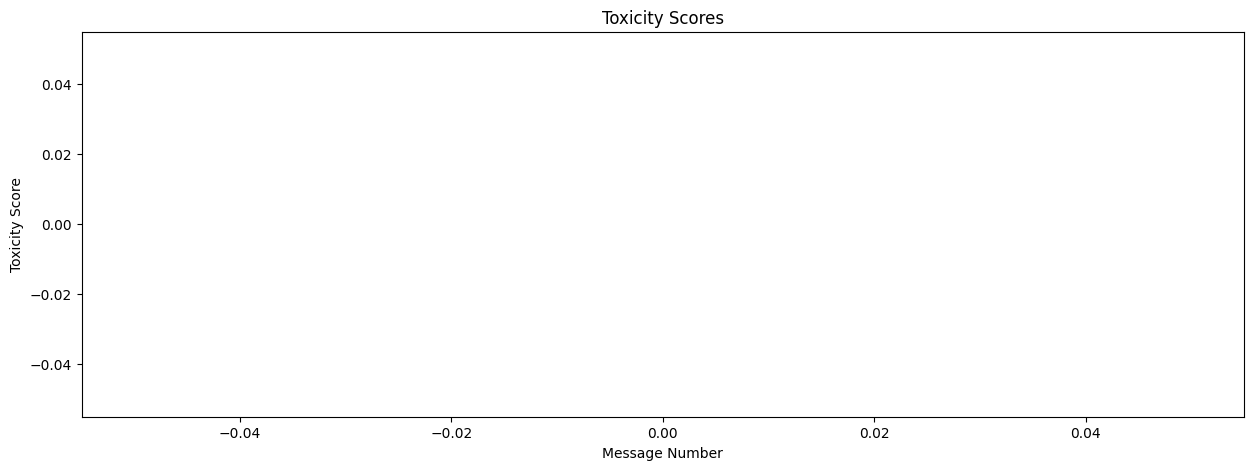

In [ ]:
# plot toxicity scores as  line chart
plt.figure(figsize=(15, 5))
plt.plot(results['toxicity'])
plt.title('Toxicity Scores')
plt.xlabel('Message Number')
plt.ylabel('Toxicity Score')
plt.show()

In [55]:
# check ratios of forwarded and not forwarded messages
results[(results['forwarded_message'] != 0 ) & (results['own_message'] != 0)]

,author,noun_count,verb_count,adj_count,positive_sentiment,negative_sentiment,neutral_sentiment,channel_messages,group_messages,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,flesch_reading_ease,liwc_I,liwc_We,liwc_You,liwc_Other,liwc_Affect,final_message,final_message_string,own_message,forwarded_message,total_message_count,was_forwarded,own_message_count,forwarded_message_count,action_quotient,sentiment_quotient,avg_flesch_reading_ease_class


In [56]:
full = pd.read_csv('../data/january_2021_groups_and_channels.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_65368/161692909.py:1: DtypeWarning: Columns (3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv('../data/january_2021_groups_and_channels.csv.gzip', compression='gzip')


In [58]:
from tqdm import tqdm

In [59]:
was_forwarded = []

for author in tqdm(full['author']):
    fwd = len(full[full['fwd_author'] == author])
    was_forwarded.append(fwd)
full['was_forwarded'] = was_forwarded

100%|██████████| 528893/528893 [02:11<00:00, 4008.26it/s]


In [60]:
wrote_own = []

for author in tqdm(full['fwd_author']):
    own = len(full[full['author'] == author])
    wrote_own.append(own)
full['wrote_own'] = wrote_own

100%|██████████| 528893/528893 [01:27<00:00, 6018.47it/s]


In [61]:
full[full['was_forwarded'] != 0]

,Unnamed: 0,UID_key,author,message,fwd_message,date,transcribed_message,group_or_channel,group_name,fwd_author,was_forwarded,wrote_own
0,203429,3690438197782804714237638,-7.735504e+17,Der Floor bezeichnet die versch. Regierungseb...,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN,14,0
1,203430,3690468197782804714237638,-3.602820e+18,Hey... ich hab nicht alle post hier gesehen vo...,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN,21,0
5,203434,3690558197782804714237638,-3.602820e+18,Wir werden es noch erfahren. Hollywood ist tie...,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN,21,0
8,203437,3690598197782804714237638,-3.602820e+18,Achsoooo🤣🤣🤣 ja ... 🙈,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN,21,0
11,203440,3690648197782804714237638,-7.735504e+17,73,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,NaN,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...
527643,12041,563735795324421879598263,5.795324e+18,NaN,Auf gehts! Jeder bringt Einen mit !,2021-01-26,NaN,channel,ddbradio,5.795324e+18,4,5
527644,12042,567705795324421879598263,5.795324e+18,NaN,<strong>Teste deine Sozialvers.-Nr. ! - Die St...,2021-01-31,NaN,channel,ddbradio,5.795324e+18,4,5
527645,13005,551885795324421879598263,5.795324e+18,NaN,"<a href=""https://www.mumble.info/downloads/"">h...",2021-01-15,NaN,channel,ddbradio,1.650127e+18,4,0
527646,13006,559095795324421879598263,5.795324e+18,NaN,"Die Maßnahmen der ersten 14 Tage <a href="""" on...",2021-01-22,NaN,channel,ddbradio,1.650127e+18,4,0


In [62]:
full[full['wrote_own'] != 0]

,Unnamed: 0,UID_key,author,message,fwd_message,date,transcribed_message,group_or_channel,group_name,fwd_author,was_forwarded,wrote_own
506,203936,3690678197782804714237638,-3.602820e+18,NaN,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,-5.465293e+18,21,10
510,203940,3690808197782804714237638,-7.735504e+17,NaN,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,6.674711e+18,14,39
525,203956,3691138197782804714237638,-8.924470e+18,NaN,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,-5.619877e+18,0,28
553,203987,3691978197782804714237638,-4.420529e+18,NaN,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,-2.716848e+18,0,1
574,204009,3692328197782804714237638,8.416713e+18,NaN,NaN,2021-01-08,NaN,group,1Research7Intelligence Room,6.635407e+18,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
527640,6541156,25428104945287925667135,-3.961926e+17,NaN,NaN,2021-01-09,NaN,group,5G - ein Verbrechen?! Gibt es chemtrails??,4.356715e+18,0,1
527643,12041,563735795324421879598263,5.795324e+18,NaN,Auf gehts! Jeder bringt Einen mit !,2021-01-26,NaN,channel,ddbradio,5.795324e+18,4,5
527644,12042,567705795324421879598263,5.795324e+18,NaN,<strong>Teste deine Sozialvers.-Nr. ! - Die St...,2021-01-31,NaN,channel,ddbradio,5.795324e+18,4,5
527647,13205,548855795324421879598263,5.795324e+18,NaN,<strong>Vorrangige Ziele der Nationalversammlu...,2021-01-12,NaN,channel,ddbradio,5.795324e+18,4,5


In [69]:
full = pd.read_csv('../data/january_2021_groups_and_channels.csv.gzip', compression='gzip')

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_65368/161692909.py:1: DtypeWarning: Columns (3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv('../data/january_2021_groups_and_channels.csv.gzip', compression='gzip')


In [70]:
full['own_message'] = [1 if x or y else 0 for x, y in tqdm(zip(full['message'].notnull(), full['transcribed_message'].notnull()))]
full['forwarded_message'] = [1 if x else 0 for x in tqdm(full['fwd_message'].notnull())]

0it [00:00, ?it/s]

528893it [00:00, 2674865.31it/s]
100%|██████████| 528893/528893 [00:00<00:00, 3933342.01it/s]


In [71]:
# aggregate by author an sum own and forwarded messages
agg = full.groupby('author').agg({'own_message': 'sum', 'forwarded_message': 'sum'})

In [72]:
# check for author who have both own and forwarded messages
agg[(agg['forwarded_message'] != 0) & (agg['own_message'] != 0)]

,own_message,forwarded_message
author,,


In [73]:
#to check that measure works
agg.forwarded_message.sum()

20498

In [74]:
#to check that measure works
agg.own_message.sum()

262473

## Toxicity

In [139]:
results = pd.read_csv('../results/post-aggregation/author_20000.csv.gzip', compression='gzip')

In [140]:
results.columns

Index(['author', 'noun_count', 'verb_count', 'adj_count', 'positive_sentiment',
       'negative_sentiment', 'neutral_sentiment', 'channel_messages',
       'group_messages', 'sent_count', 'word_count', 'avg_sent_length',
       'avg_word_length', 'exclamation_count', 'question_count', 'emoji_count',
       'flesch_reading_ease', 'liwc_I', 'liwc_We', 'liwc_You', 'liwc_Other',
       'liwc_Affect', 'final_message', 'final_message_string', 'own_message',
       'forwarded_message', 'total_message_count', 'was_forwarded',
       'own_message_count', 'forwarded_message_count', 'action_quotient',
       'sentiment_quotient', 'avg_flesch_reading_ease_class', 'toxicity'],
      dtype='object')

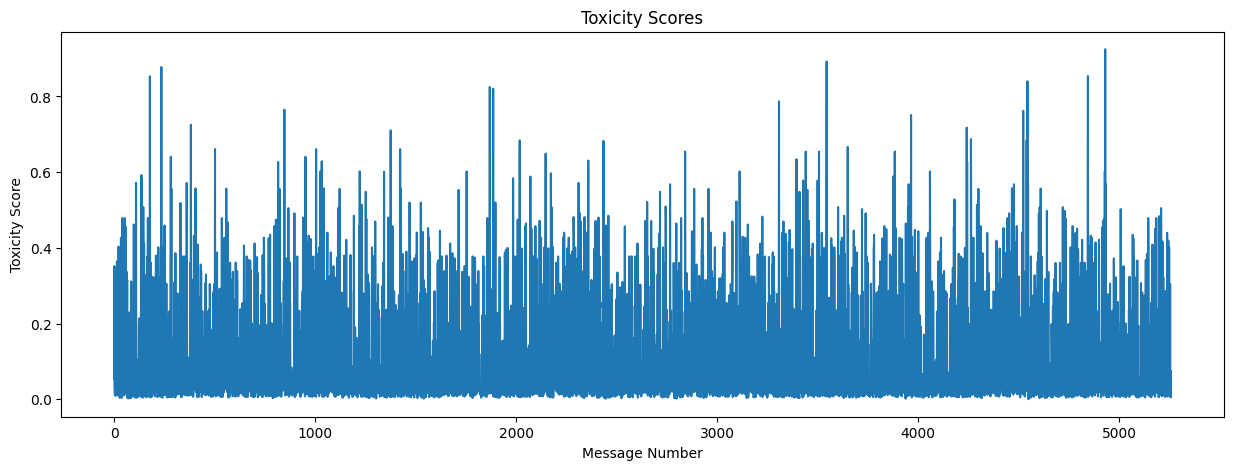

In [141]:
#plot toxicity scores as line chart for non null values
plt.figure(figsize=(15, 5))
plt.plot(results[results['toxicity'].notnull()]['toxicity'])
plt.title('Toxicity Scores')
plt.xlabel('Message Number')
plt.ylabel('Toxicity Score')
plt.show()

In [98]:
from tqdm import tqdm
#from src.functions.linguistic_features import toxicity_detection
from googleapiclient import discovery
from config import API_KEY

client = discovery.build(
"commentanalyzer",
"v1alpha1",
developerKey=API_KEY,
discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
static_discovery=False,
)

In [99]:
def toxicity_detection(message, client):
    analyze_request = {
        'comment': { 'text': f"{message}" },
        'languages' : ["de"],
        'requestedAttributes': {'TOXICITY': {}},
    }
    response = client.comments().analyze(body=analyze_request).execute()
    toxic =response['attributeScores']['TOXICITY']['summaryScore']['value']
    return toxic

In [100]:
toxicity_detection('sehr informative Sendung!!', client)

0.015770407

In [115]:
import random
#initialize column
toxicity = []

for i in tqdm(range(len(results))):
    row = results.iloc[i]
    message = row['final_message_string']
    if row['own_message'] == 1:
        tox = toxicity_detection(message, client)
        toxicity.append(tox)
    else:
        toxicity.append(np.nan)

results['toxicity'] = toxicity

  0%|          | 0/175 [00:00<?, ?it/s]

100%|██████████| 175/175 [00:34<00:00,  5.12it/s]


In [116]:
results['toxicity']

0      0.015770
1      0.285497
2      0.113987
3      0.020843
4      0.011184
         ...   
170         NaN
171         NaN
172         NaN
173         NaN
174         NaN
Name: toxicity, Length: 175, dtype: float64

In [118]:
results[(results['toxicity'].isnull())]

,author,noun_count,verb_count,adj_count,positive_sentiment,negative_sentiment,neutral_sentiment,channel_messages,group_messages,sent_count,word_count,avg_sent_length,avg_word_length,exclamation_count,question_count,emoji_count,flesch_reading_ease,liwc_I,liwc_We,liwc_You,liwc_Other,liwc_Affect,final_message,final_message_string,own_message,forwarded_message,total_message_count,was_forwarded,own_message_count,forwarded_message_count,action_quotient,sentiment_quotient,avg_flesch_reading_ease_class,toxicity
155,-8.564481e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN
156,-8.451918e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2,0,0,2,NaN,NaN,unclassified,NaN
157,-6.525030e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN
158,-5.899023e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN
159,-5.761584e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN
160,-5.207697e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN
161,-5.037126e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN
162,-4.774637e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN
163,-3.890931e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN
164,-3.554068e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,1,NaN,NaN,unclassified,NaN


In [114]:
type(results.loc['final_message_string'][-1])

KeyError: 'final_message_string'

In [ ]:
# use lambda apply to apply function to each row
toxicity_new = []

for mes in results['final_message_string']:
    if isinstance(mes, str):
        tox = toxicity_detection(mes, client)
        toxicity_new.append(tox)
    else:
        toxicity_new.append(np.nan)

results['toxicity_'] = toxicity_new

KeyboardInterrupt: 

In [ ]:
results['toxicity_']

KeyError: 'toxicity_new'

# Preparing DFs for GAT

In [14]:
sample_size = 200
import pandas as pd
import torch

In [6]:
dataset = pd.read_csv(f'../data/samples/messages_sample_{sample_size}.csv.gzip', compression='gzip')
agg_dataset = pd.read_csv(f'../data/aggregated/author_{sample_size}.csv.gzip', compression='gzip')

In [7]:
dataset.head()

,Unnamed: 0,UID_key,author,fwd_message,fwd_author,date,group_or_channel,own_message,forwarded_message,group_name,fwd_message_string,final_message,final_message_string
0,322653,222925-2216795262304420685,6.320182e+18,NaN,NaN,2021-01-19,group,1,0,Alles Ausser Mainstream Chat,NaN,Bitte Karamell...🤩,Bitte Karamell...
1,70022,1271573869444217863415830,3.869444e+18,NaN,NaN,2021-01-05,group,1,0,Aufrichtige💚Menschen Cue+Chat Fregatte Deutsch...,NaN,R. Cue?,R. Cue?
2,9457,3761868197782804714237638,4.462220e+17,NaN,NaN,2021-01-10,group,1,0,1Research7Intelligence Room,NaN,"Nee alles gut, war nur n Reflex.","Nee alles gut, war nur n Reflex."
3,163470,20498168200335715773759193,7.853990e+18,NaN,NaN,2021-01-18,group,1,0,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",NaN,We are all searching for truth-givers. We are ...,We are all searching for truth-givers. We are ...
4,198210,21361398200335715773759193,-4.898957e+18,NaN,NaN,2021-01-23,group,1,0,"BEFREIUNG DEUTSCHLAND, ÖSTERREICH, SCHWEIZ💃🕺💃 ...",NaN,Er ist und bleibt mein Präsident,Er ist und bleibt mein Präsident


In [8]:
agg_dataset.head()

,author,noun_count,verb_count,adj_count,positive_sentiment,negative_sentiment,neutral_sentiment,channel_messages,group_messages,sent_count,...,liwc_We,liwc_You,liwc_Other,liwc_Affect,final_message,final_message_string,own_message,forwarded_message,total_message_count,was_forwarded
0,-9.182988e+18,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.000000,sehr informative Sendung!!,sehr informative Sendung!!,1,0,1,0
1,-9.101848e+18,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.000000,Ist AttilaKim Diktator entaucht...... <a href...,Ist AttilaKim Diktator entaucht......,1,0,1,0
2,-8.836061e+18,7.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.026316,"Roger hatte da so Grafiken, wo man die Sterber...","Roger hatte da so Grafiken, wo man die Sterber...",1,0,1,0
3,-8.780262e+18,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,👍,,1,0,1,0
4,-8.579580e+18,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.000000,Distelöl? Wie sieht's da mit dem Omega 6 Gehal...,Distelöl? Wie sieht's da mit dem Omega 6 Gehal...,1,0,1,0


In [9]:
agg_dataset.dtypes

author                  float64
noun_count              float64
verb_count              float64
adj_count               float64
positive_sentiment      float64
negative_sentiment      float64
neutral_sentiment       float64
channel_messages        float64
group_messages          float64
sent_count              float64
word_count              float64
avg_sent_length         float64
avg_word_length         float64
exclamation_count       float64
question_count          float64
emoji_count             float64
flesch_reading_ease     float64
liwc_I                  float64
liwc_We                 float64
liwc_You                float64
liwc_Other              float64
liwc_Affect             float64
final_message            object
final_message_string     object
own_message               int64
forwarded_message         int64
total_message_count       int64
was_forwarded             int64
dtype: object

In [10]:
feature_columns = agg_dataset.columns[1:]
feature_columns = [feat for feat in feature_columns if (feat != 'final_message_string') & (feat != 'final_message')]

In [11]:
feature_columns

['noun_count',
 'verb_count',
 'adj_count',
 'positive_sentiment',
 'negative_sentiment',
 'neutral_sentiment',
 'channel_messages',
 'group_messages',
 'sent_count',
 'word_count',
 'avg_sent_length',
 'avg_word_length',
 'exclamation_count',
 'question_count',
 'emoji_count',
 'flesch_reading_ease',
 'liwc_I',
 'liwc_We',
 'liwc_You',
 'liwc_Other',
 'liwc_Affect',
 'own_message',
 'forwarded_message',
 'total_message_count',
 'was_forwarded']

In [12]:
def create_feature_matrix(dataset):
    dataset = dataset.fillna(0)
    # Create empty lists for COO sparse matrix format (row, col, data)
    row_indices = []
    col_indices = []
    data = []
    feature_columns = dataset.columns[1:]
    feature_columns = [feat for feat in feature_columns if (feat != 'final_message_string') & (feat != 'final_message')]

    # Create mapping of unique authors to indices
    authors = sorted(set(dataset['author']))
    author_idx_map = {author: idx for idx, author in enumerate(authors)}

    for idx, row in dataset.iterrows():
        for col, feature in enumerate(row[feature_columns]): 
            # to create a sparse matrix, only include non-zero features
            if feature != 0:
                row_indices.append(idx)
                col_indices.append(col)
                data.append(feature)

    ########## CONVERT TO TENSOR ##########
    feature_tensor = torch.sparse_coo_tensor(
        indices=torch.tensor([row_indices, col_indices]),
        values=torch.tensor(data, dtype=torch.float32),
        size=(len(dataset), len(feature_columns))
    ).to_dense()

    print('Feature matrix created.')
    return feature_tensor

# Matrix mismatch

In [4]:
sample_size = 'full'

In [5]:
dataset = pd.read_csv(f'../data/samples/messages_sample_{sample_size}.csv.gzip', compression='gzip')
agg_dataset = pd.read_csv(f'../data/aggregated/author_{sample_size}.csv.gzip', compression='gzip')

In [13]:
print(len(dataset['author'].unique()))
print(len(agg_dataset['author'].unique()))

16886
16885


In [14]:
# Step 2: Get unique authors from both datasets
original_authors = set(dataset['author'].unique())
agg_authors = set(agg_dataset['author'].unique())

In [15]:
# Step 4: Identify missing authors
missing_authors = original_authors - agg_authors

In [16]:
print(missing_authors)

{nan}


In [17]:
len(missing_authors)

1

In [19]:
len(dataset[dataset['author'].isin(missing_authors)])

13

In [21]:
# display all columns
pd.set_option('display.max_columns', None)

In [23]:
# drop cols from dataset where author is in missing authors
dataset = dataset[~dataset['author'].isin(missing_authors)]

In [24]:
dataset.to_csv(f'../data/samples/messages_sample_{sample_size}.csv.gzip', compression='gzip')